In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv("C:\\Users\\abhay\\Downloads\\train_FD002.csv")


# Understanding the dataset

In [3]:
print(f"Dataset shape: {data.shape}")

Dataset shape: (53759, 27)


In [4]:
print(f"Sample data:\n{data.head()}")

Sample data:
   Engine  Cycles  Sensor1  Sensor2  Sensor3  Sensor4  Sensor5  Sensor6  \
0       1       1  34.9983   0.8400    100.0   449.44   555.32  1358.61   
1       1       2  41.9982   0.8408    100.0   445.00   549.90  1353.22   
2       1       3  24.9988   0.6218     60.0   462.54   537.31  1256.76   
3       1       4  42.0077   0.8416    100.0   445.00   549.51  1354.03   
4       1       5  25.0005   0.6203     60.0   462.54   537.07  1257.71   

   Sensor7  Sensor8  ...  Sensor16  Sensor17  Sensor18  Sensor19  Sensor20  \
0  1137.23     5.48  ...   2387.72   8048.56    9.3461      0.02       334   
1  1125.78     3.91  ...   2387.66   8072.30    9.3774      0.02       330   
2  1047.45     7.05  ...   2028.03   7864.87   10.8941      0.02       309   
3  1126.38     3.91  ...   2387.61   8068.66    9.3528      0.02       329   
4  1047.93     7.05  ...   2028.00   7861.23   10.8963      0.02       309   

   Sensor21  Sensor22  Sensor23  Sensor24  Remaining Cycles  
0    

In [5]:
print(f"Missing values:\n{data.isnull().sum()}")

Missing values:
Engine              0
Cycles              0
Sensor1             0
Sensor2             0
Sensor3             0
Sensor4             0
Sensor5             0
Sensor6             0
Sensor7             0
Sensor8             0
Sensor9             0
Sensor10            0
Sensor11            0
Sensor12            0
Sensor13            0
Sensor14            0
Sensor15            0
Sensor16            0
Sensor17            0
Sensor18            0
Sensor19            0
Sensor20            0
Sensor21            0
Sensor22            0
Sensor23            0
Sensor24            0
Remaining Cycles    0
dtype: int64


In [6]:
print(f"Data information:\n{data.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53759 entries, 0 to 53758
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine            53759 non-null  int64  
 1   Cycles            53759 non-null  int64  
 2   Sensor1           53759 non-null  float64
 3   Sensor2           53759 non-null  float64
 4   Sensor3           53759 non-null  float64
 5   Sensor4           53759 non-null  float64
 6   Sensor5           53759 non-null  float64
 7   Sensor6           53759 non-null  float64
 8   Sensor7           53759 non-null  float64
 9   Sensor8           53759 non-null  float64
 10  Sensor9           53759 non-null  float64
 11  Sensor10          53759 non-null  float64
 12  Sensor11          53759 non-null  float64
 13  Sensor12          53759 non-null  float64
 14  Sensor13          53759 non-null  float64
 15  Sensor14          53759 non-null  float64
 16  Sensor15          53759 non-null  float6

In [7]:
# Descriptive statistics
print(f"Descriptive statistics:\n{data.describe()}")

Descriptive statistics:
             Engine        Cycles       Sensor1       Sensor2       Sensor3  \
count  53759.000000  53759.000000  53759.000000  53759.000000  53759.000000   
mean     131.082981    109.154746     23.998407      0.572056     94.046020   
std       74.463862     69.180569     14.747376      0.310016     14.237735   
min        1.000000      1.000000      0.000000      0.000000     60.000000   
25%       68.000000     52.000000     10.004600      0.250700    100.000000   
50%      131.000000    104.000000     25.001300      0.700000    100.000000   
75%      195.000000    157.000000     41.998000      0.840000    100.000000   
max      260.000000    378.000000     42.008000      0.842000    100.000000   

            Sensor4       Sensor5       Sensor6       Sensor7       Sensor8  \
count  53759.000000  53759.000000  53759.000000  53759.000000  53759.000000   
mean     472.910207    579.672399   1419.971013   1205.442024      8.031986   
std       26.389707     37.

# Data visualization

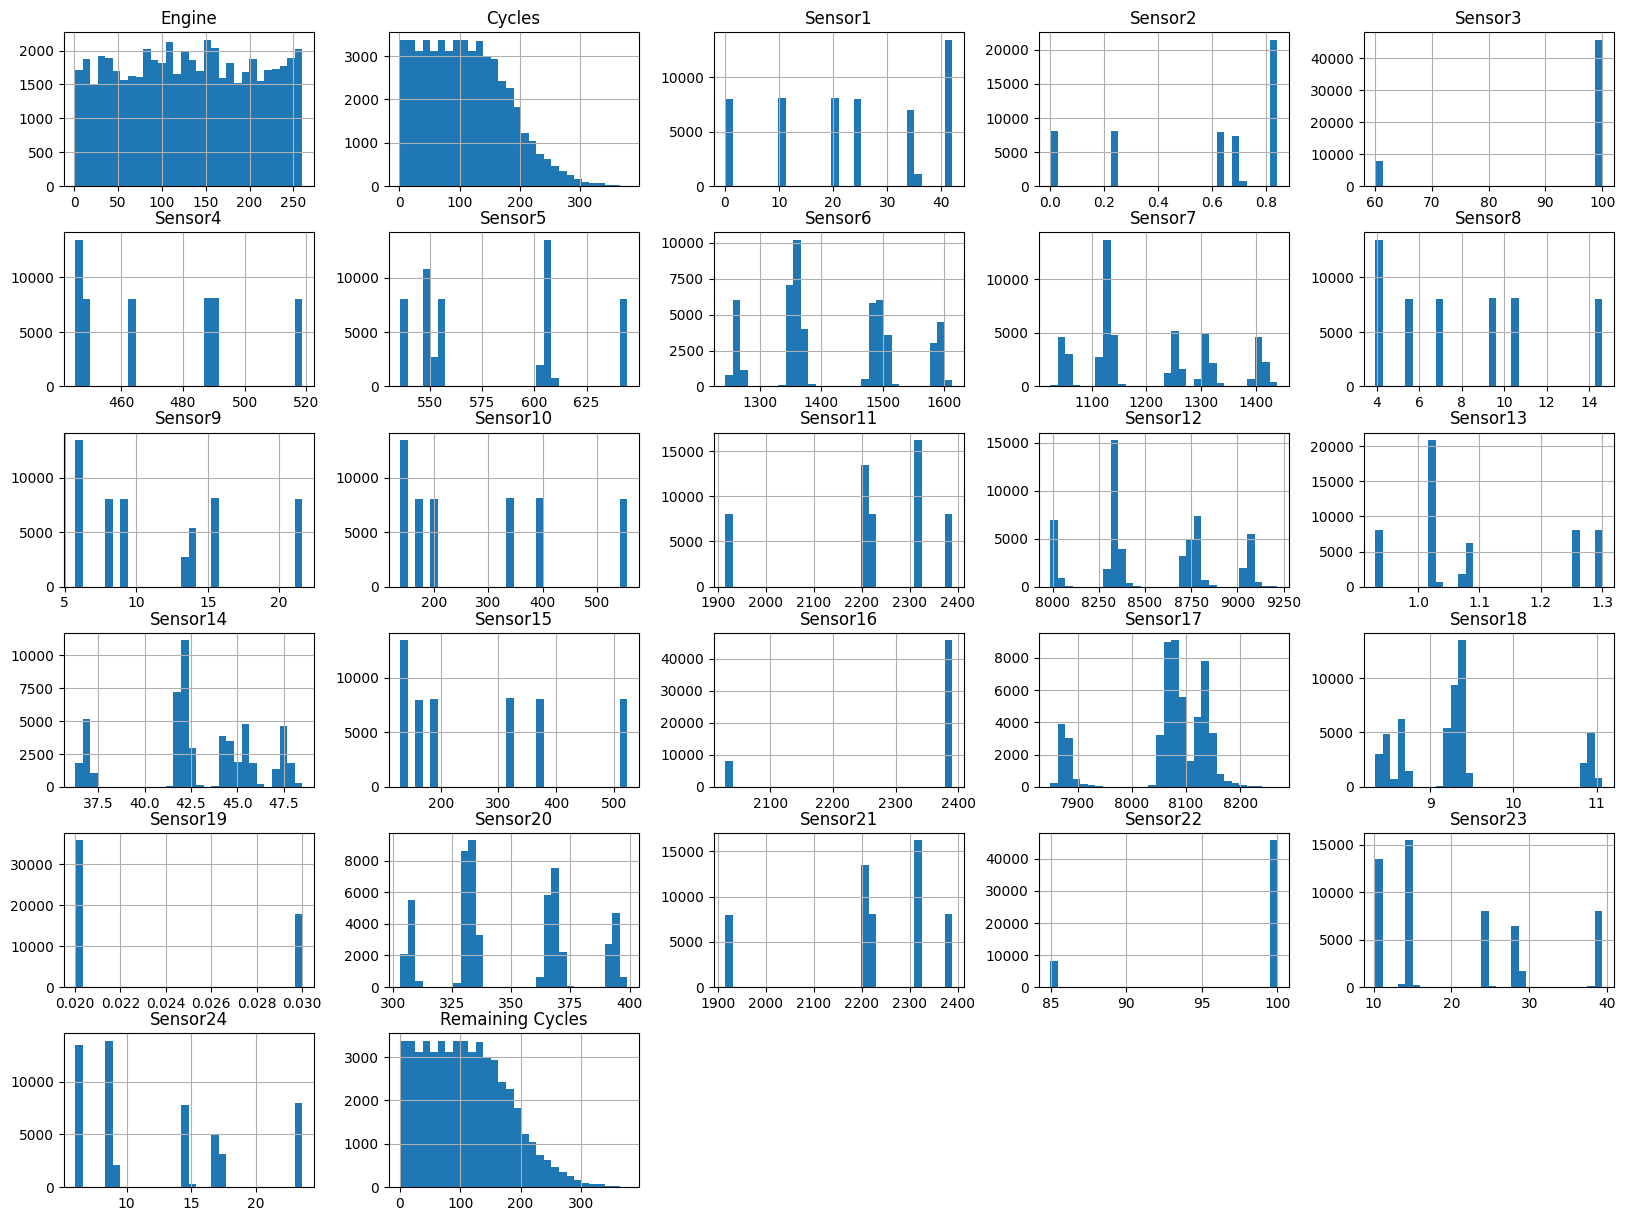

In [8]:
# Histograms

data.hist(bins=30, figsize=(20,15))
plt.show()

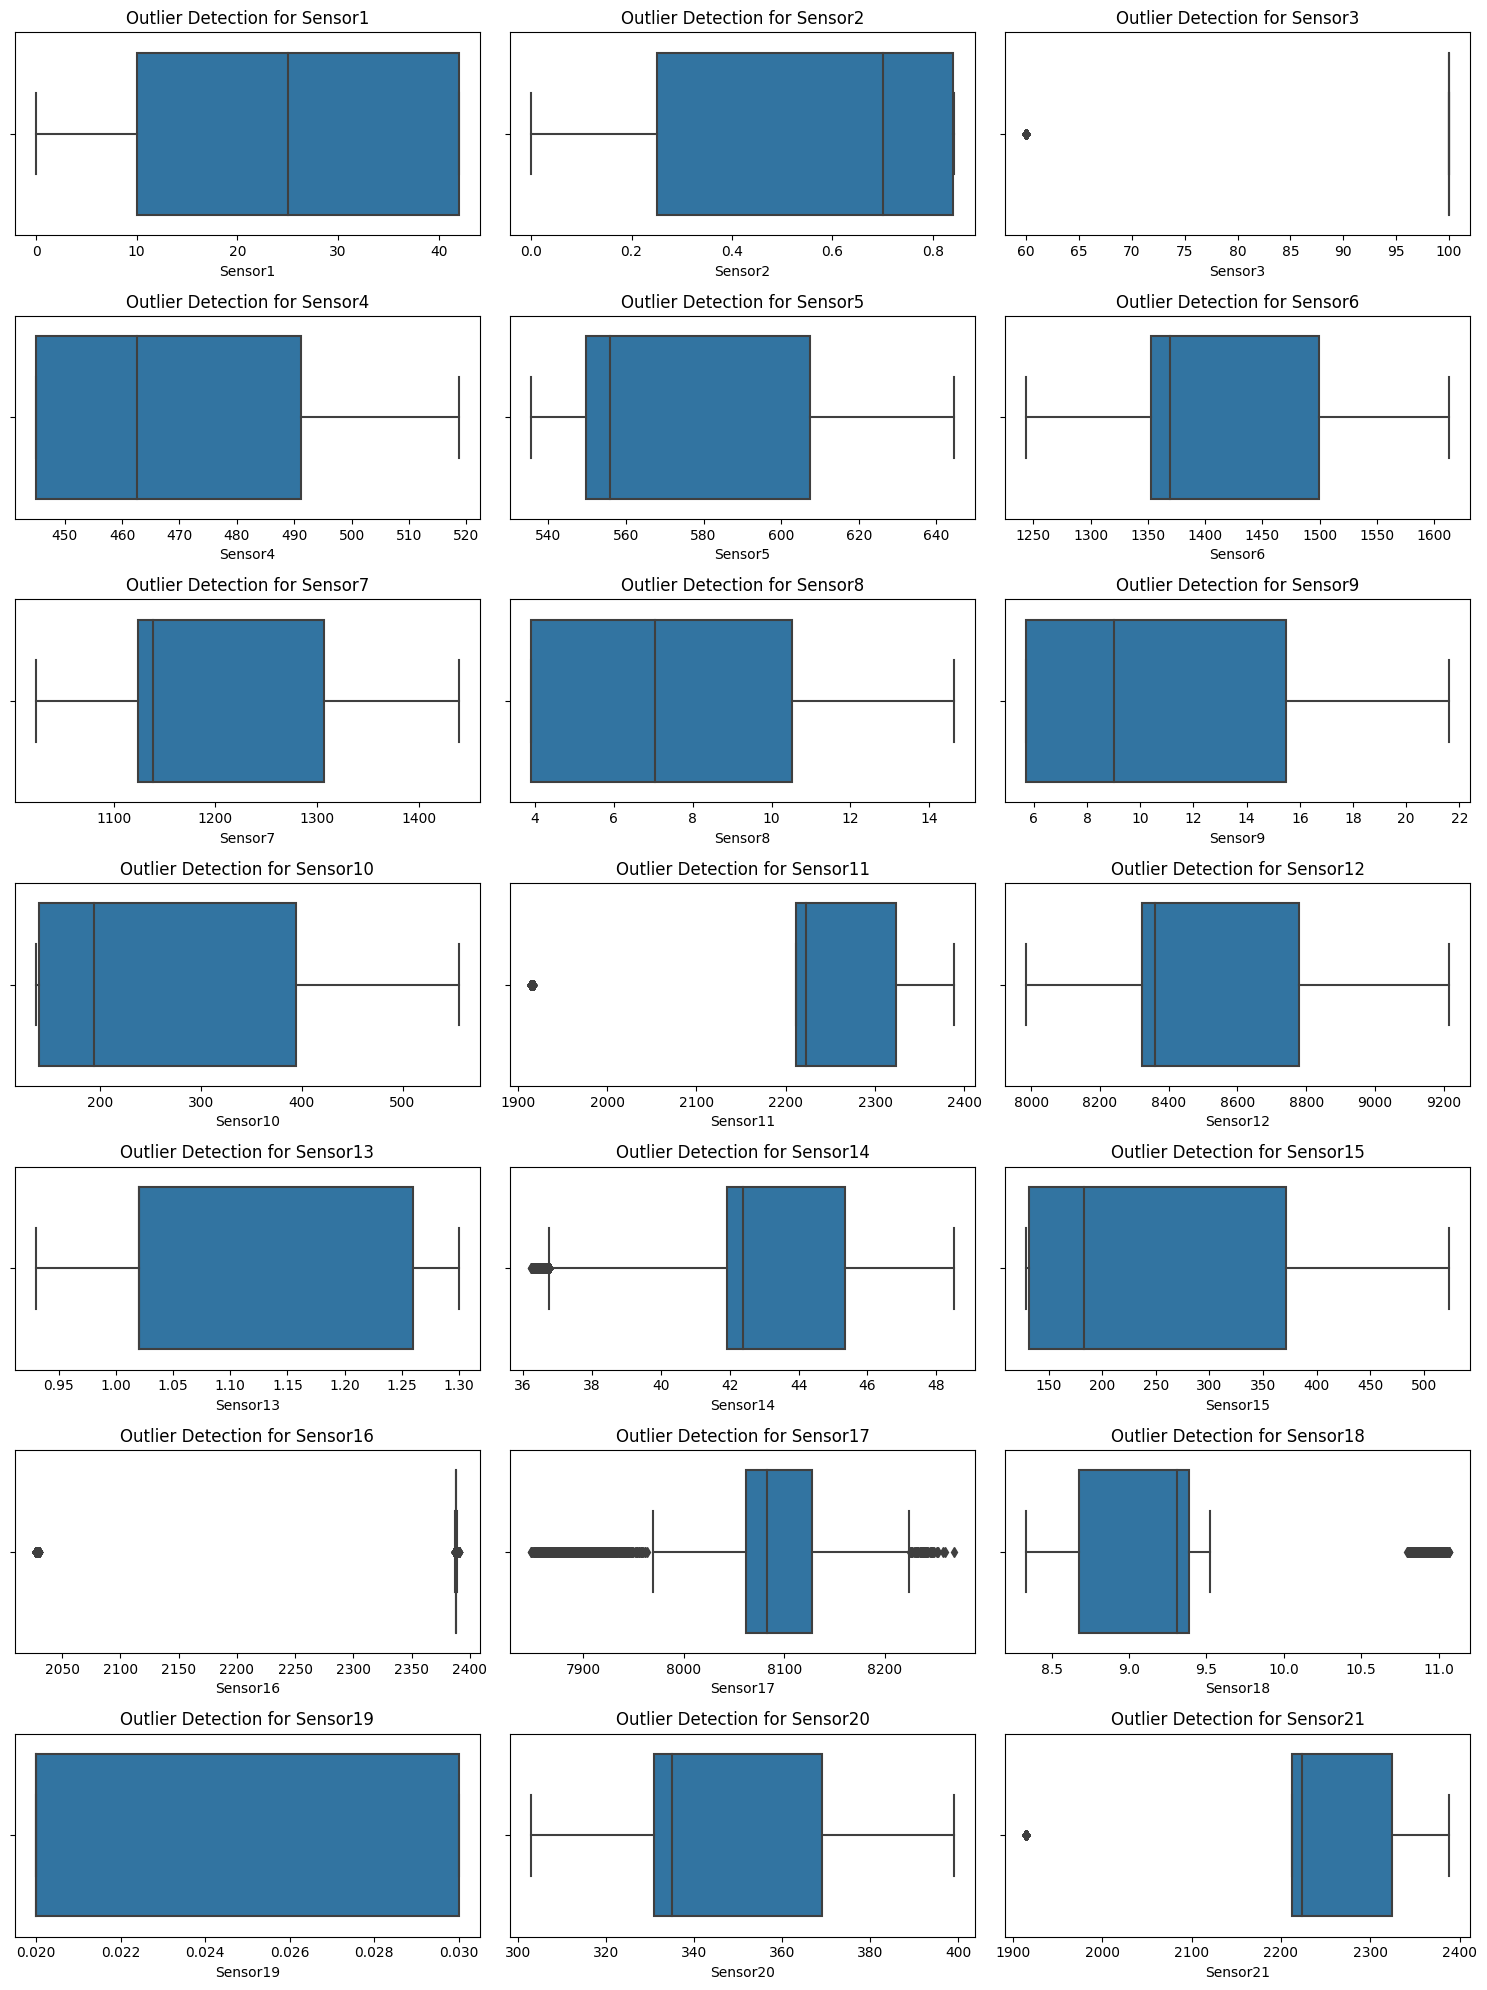

In [9]:
# Boxplots for outlier detection

fig, axs = plt.subplots(7, 3, figsize=(15, 20))
axs = axs.ravel()

for i, col in enumerate(['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4', 'Sensor5', 'Sensor6', 'Sensor7', 'Sensor8', 'Sensor9', 'Sensor10', 'Sensor11', 'Sensor12', 'Sensor13', 'Sensor14', 'Sensor15', 'Sensor16', 'Sensor17', 'Sensor18', 'Sensor19', 'Sensor20', 'Sensor21']):
    sns.boxplot(data=data, x=col, ax=axs[i])
    axs[i].set_title(f"Outlier Detection for {col}")

plt.tight_layout()
plt.show()

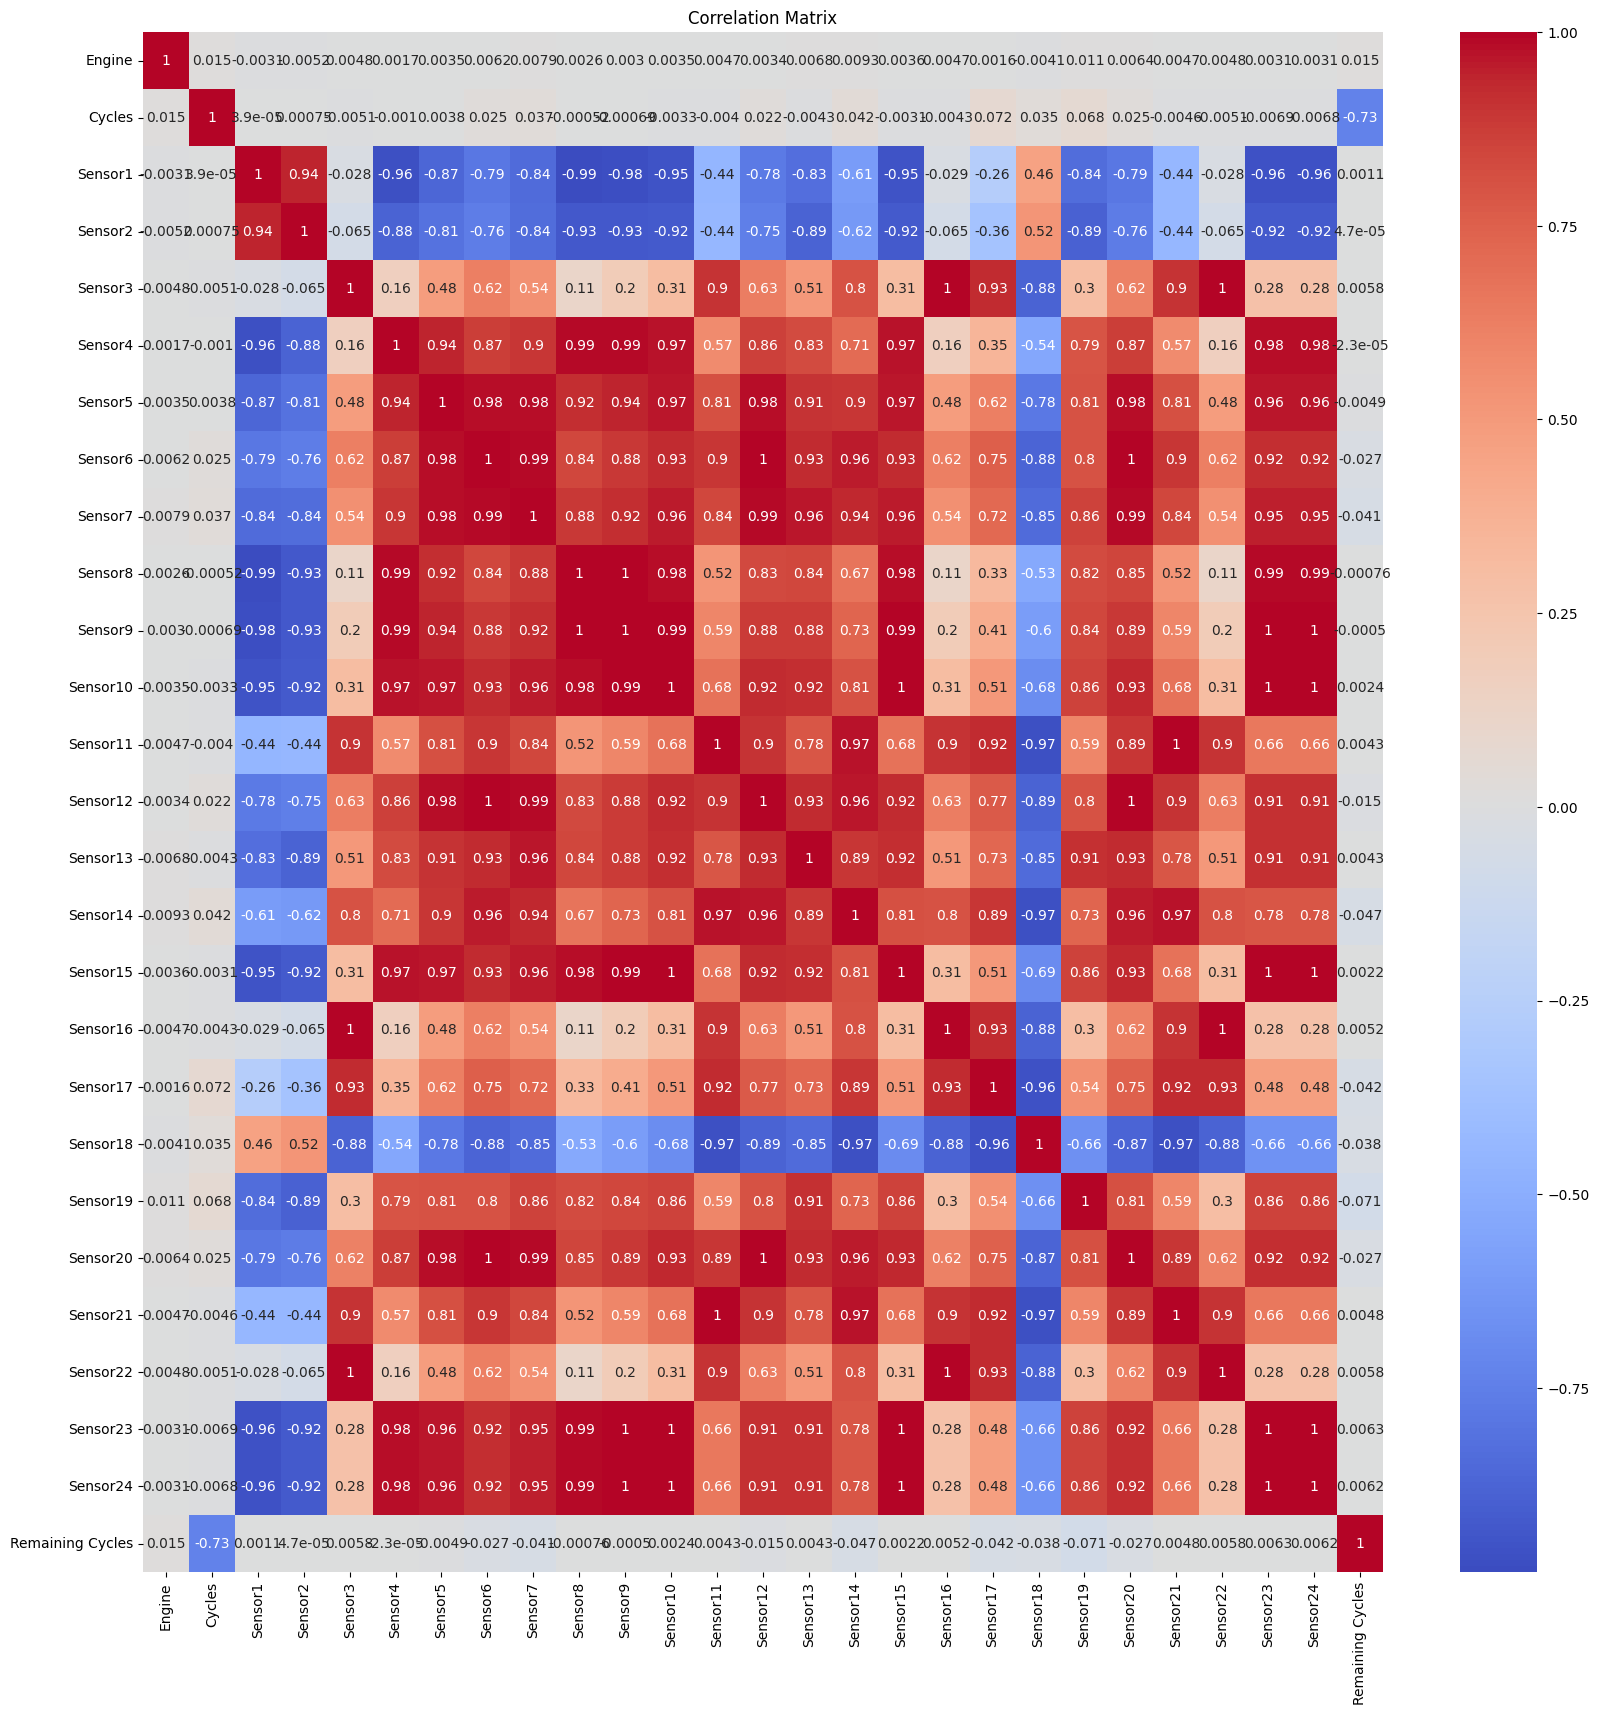

In [10]:
# Correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig('Correlation matrix.png')
plt.show()

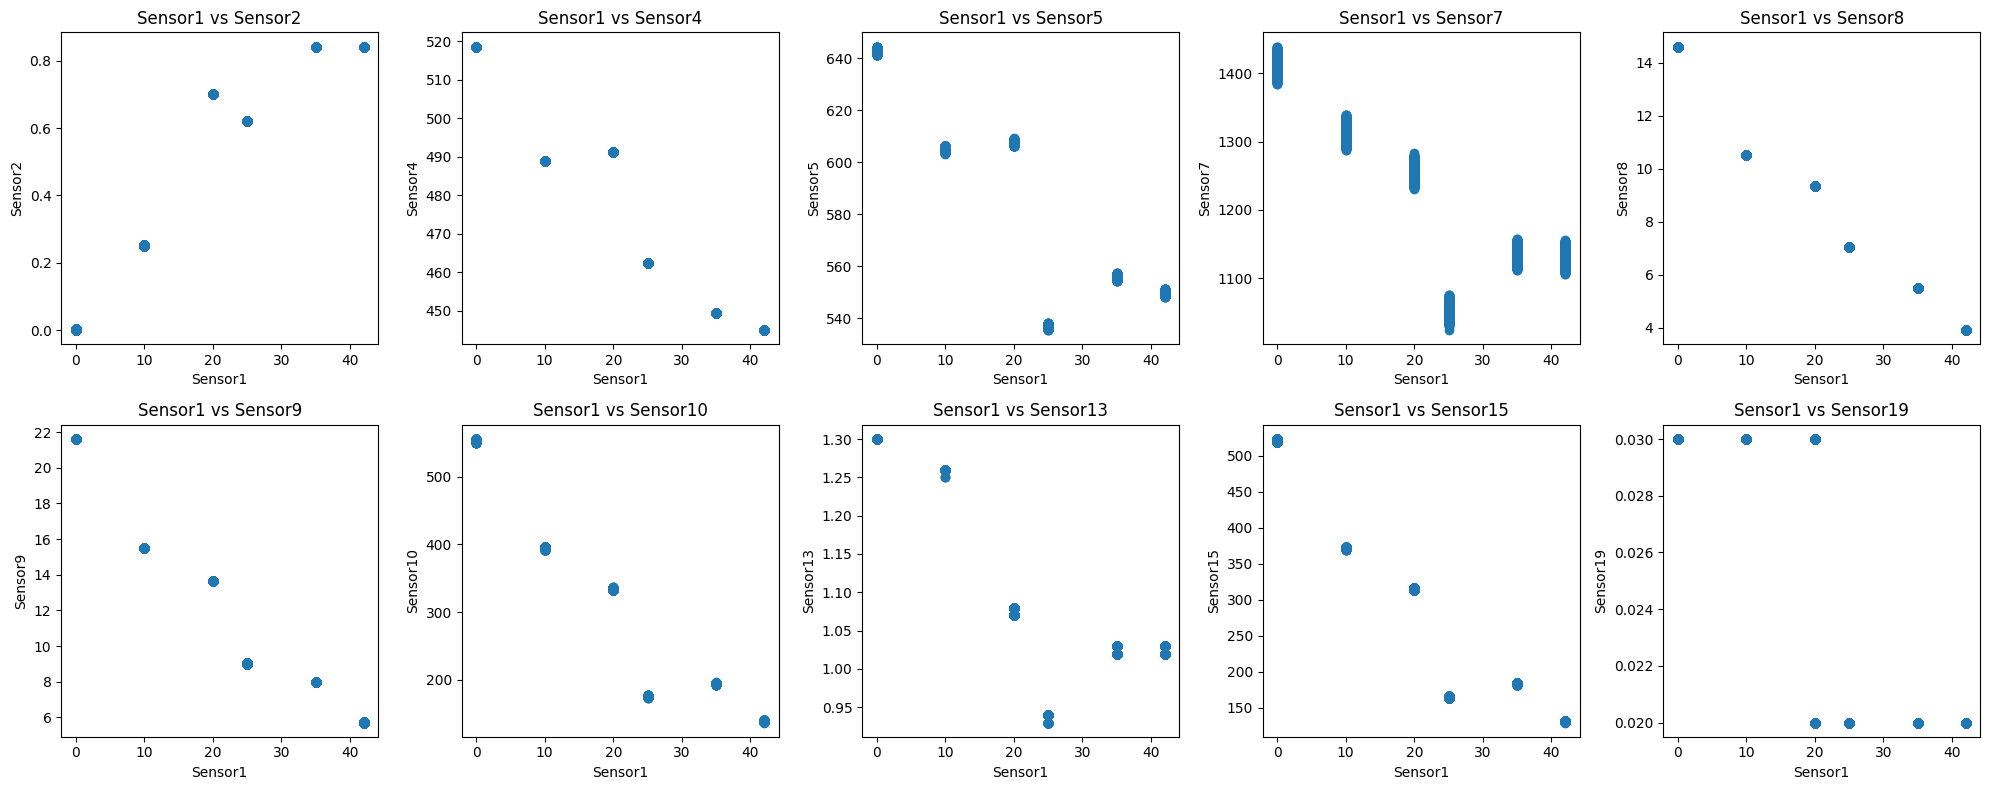

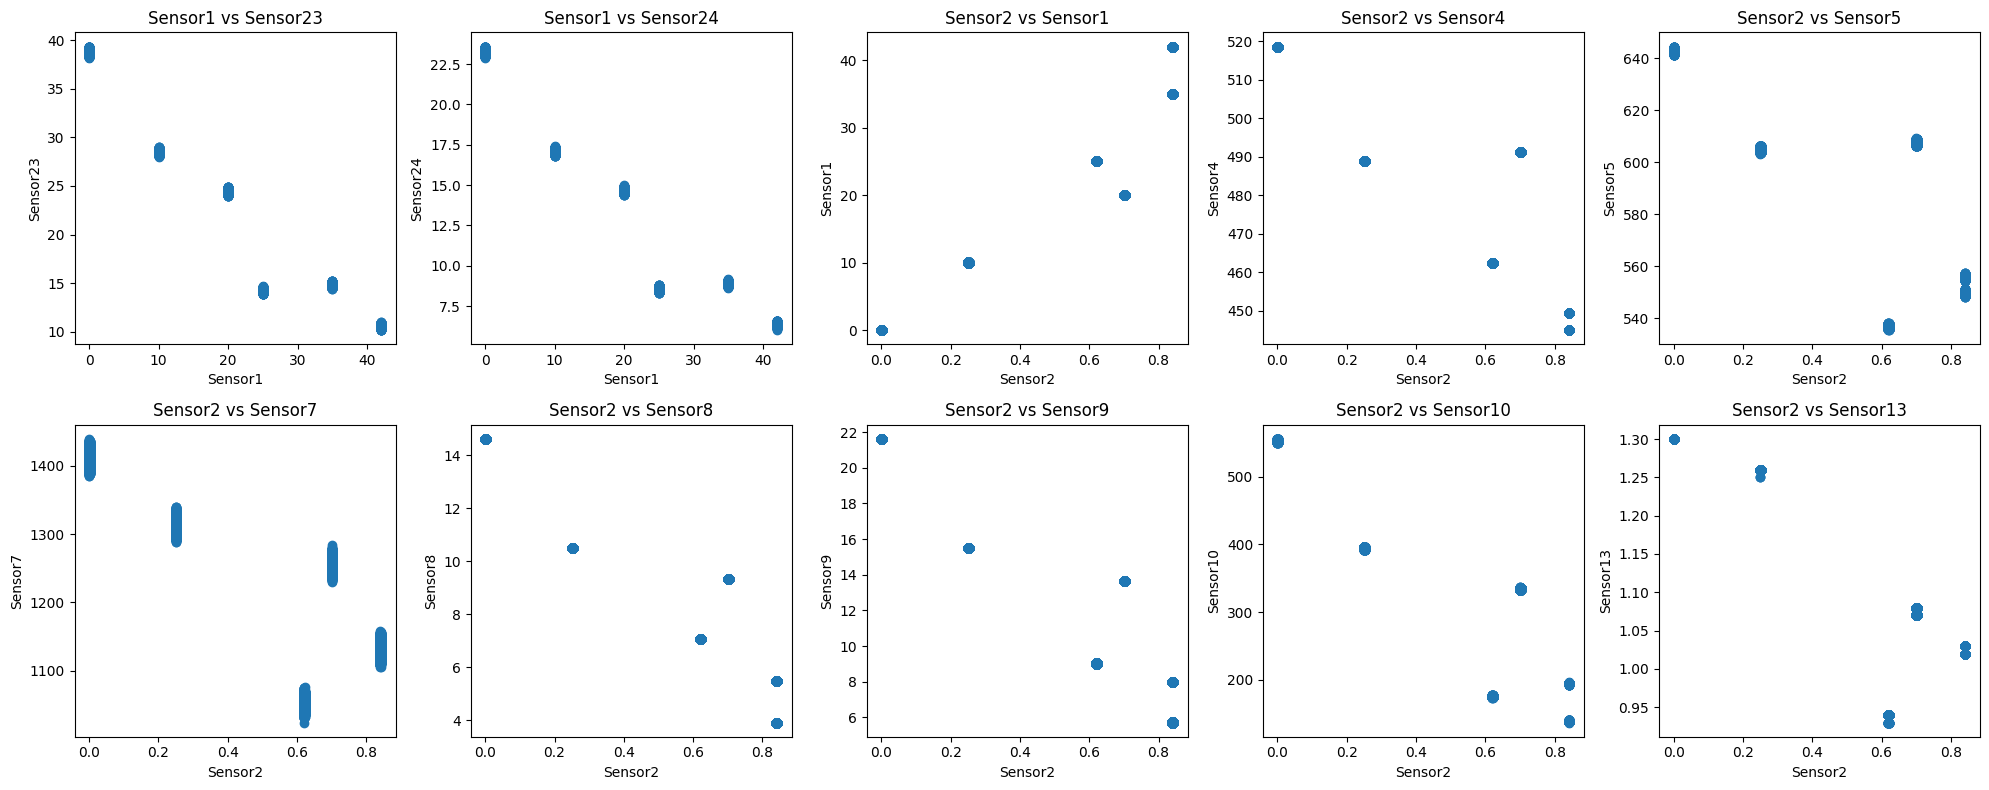

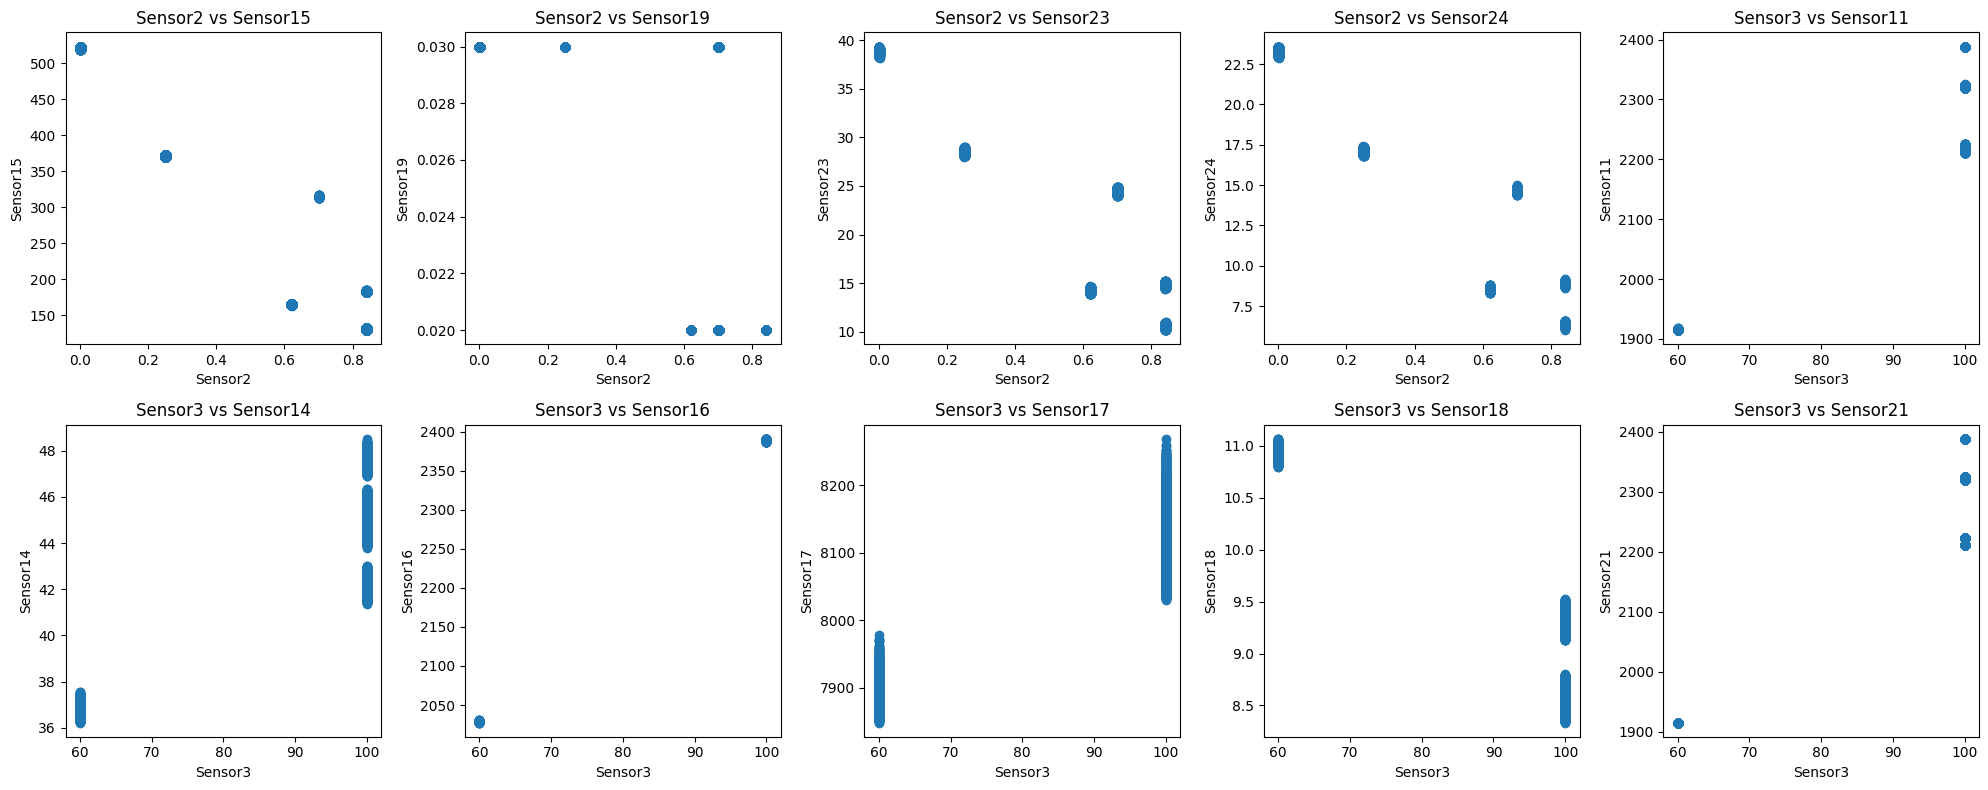

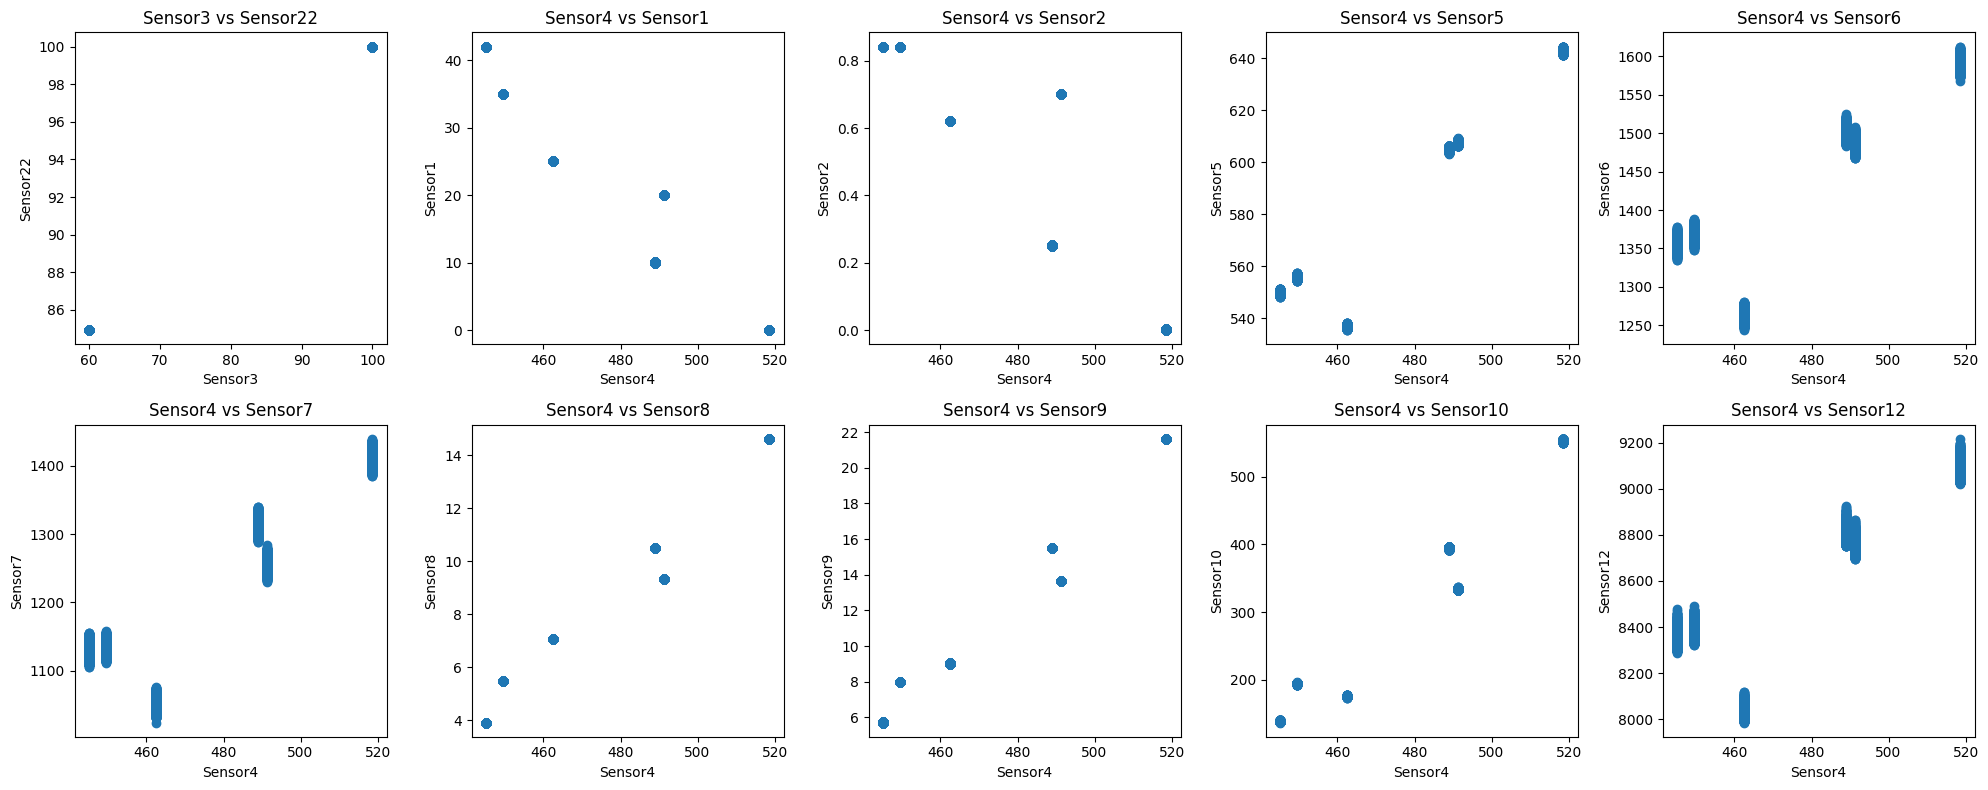

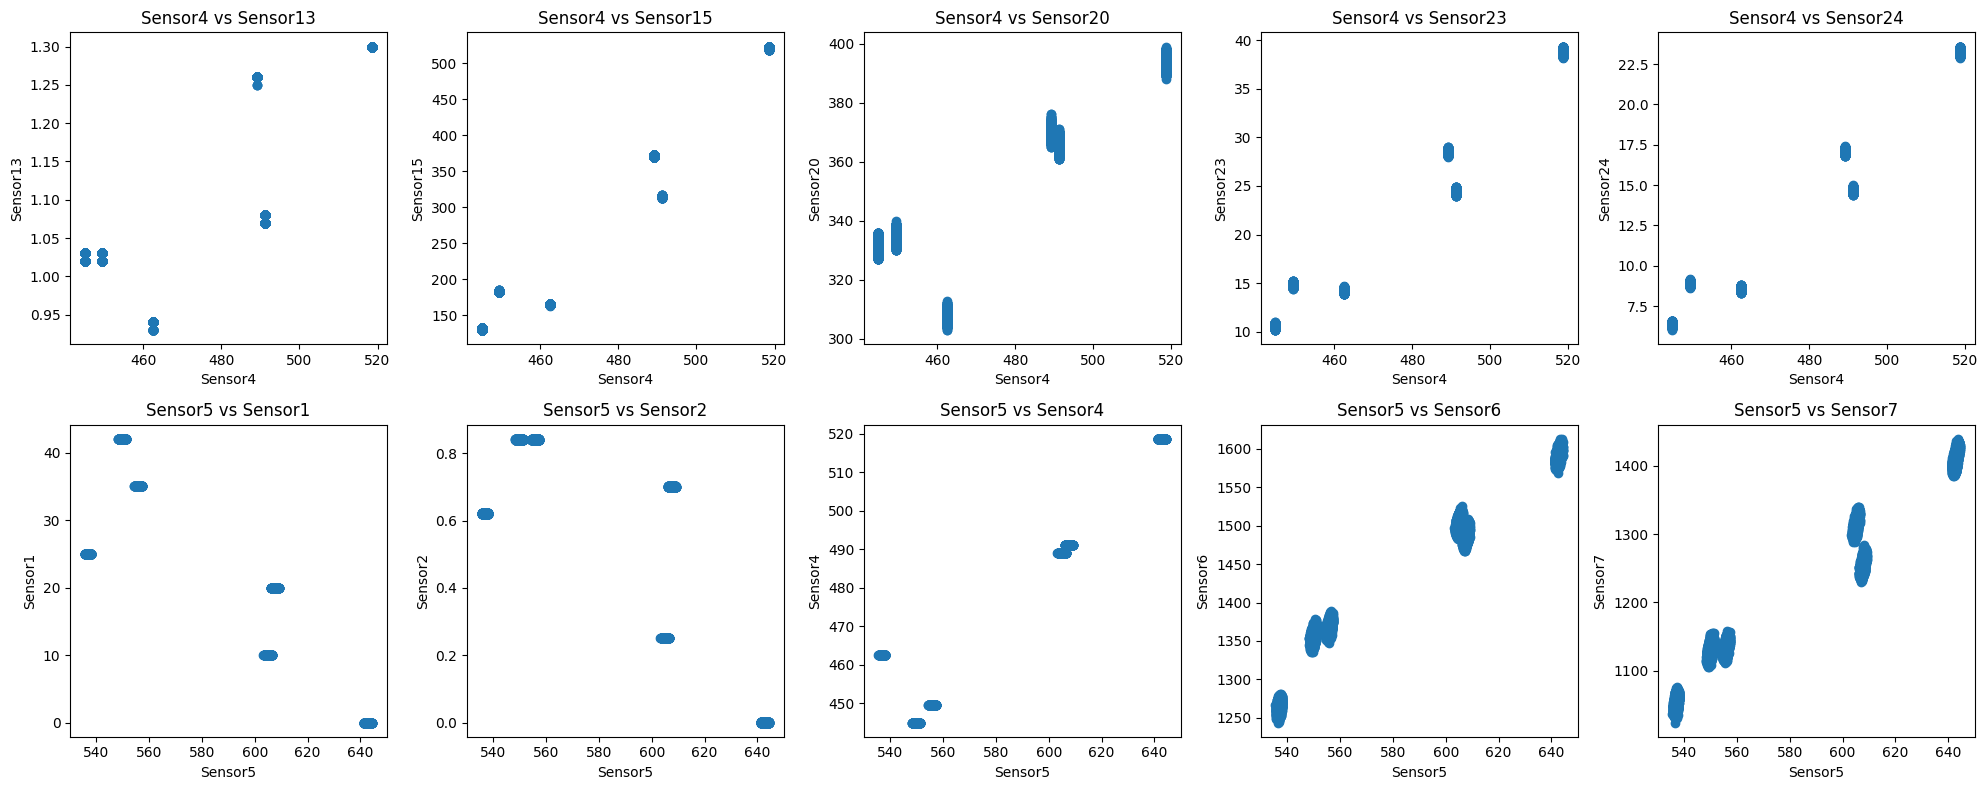

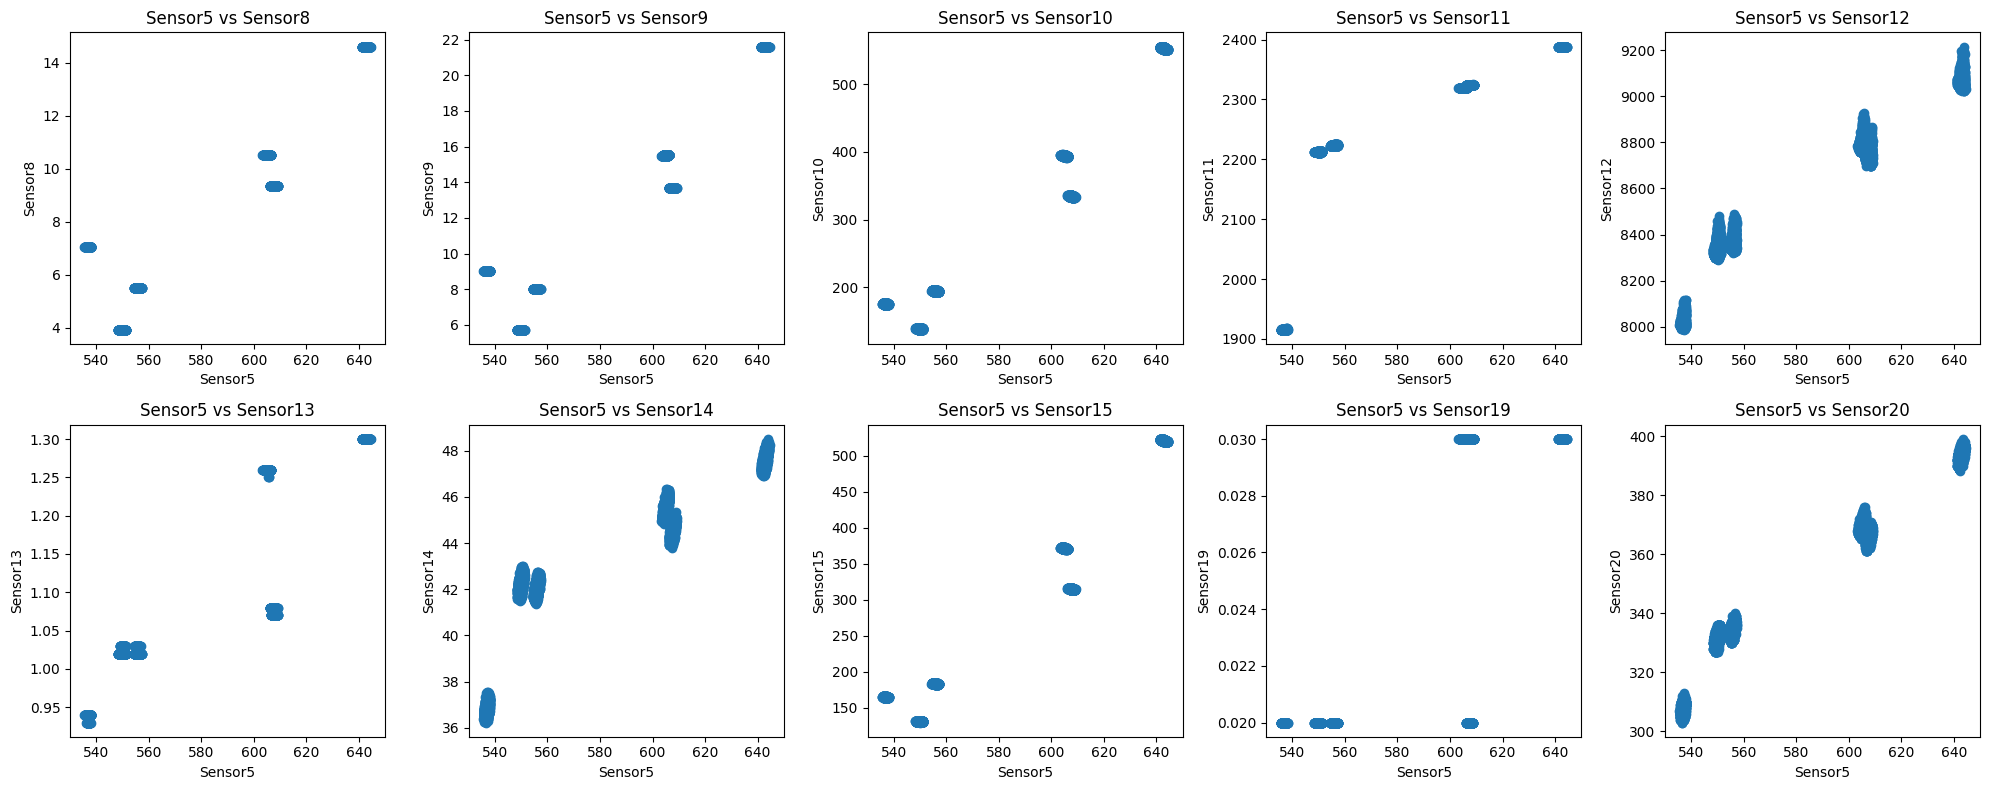

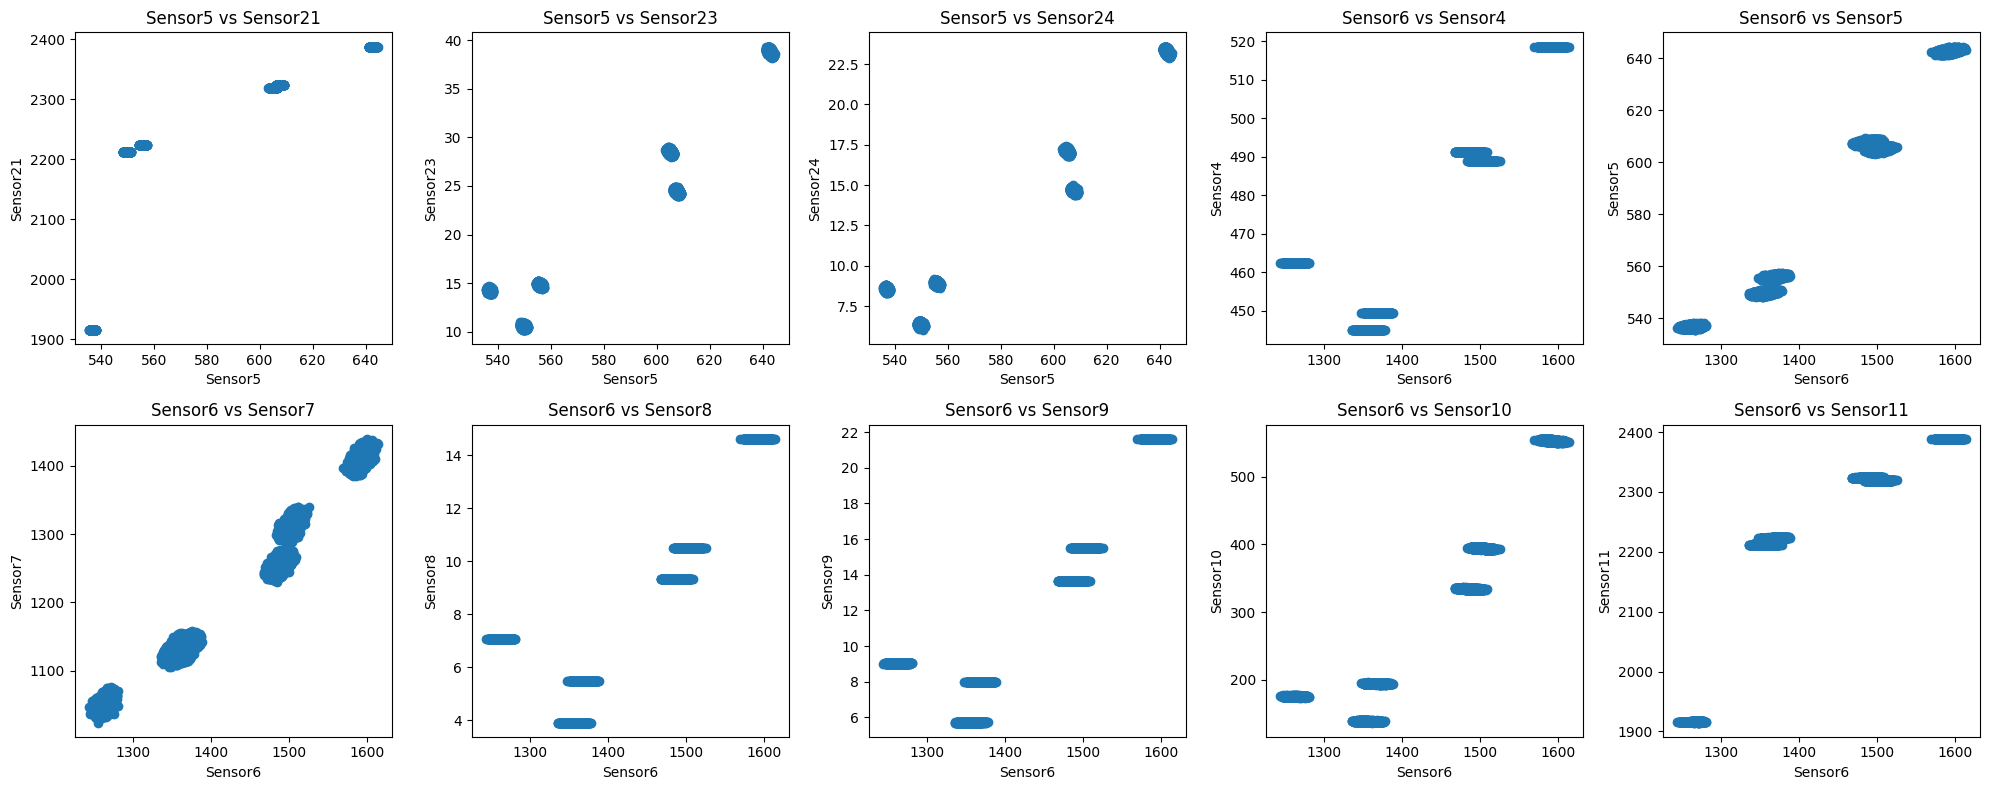

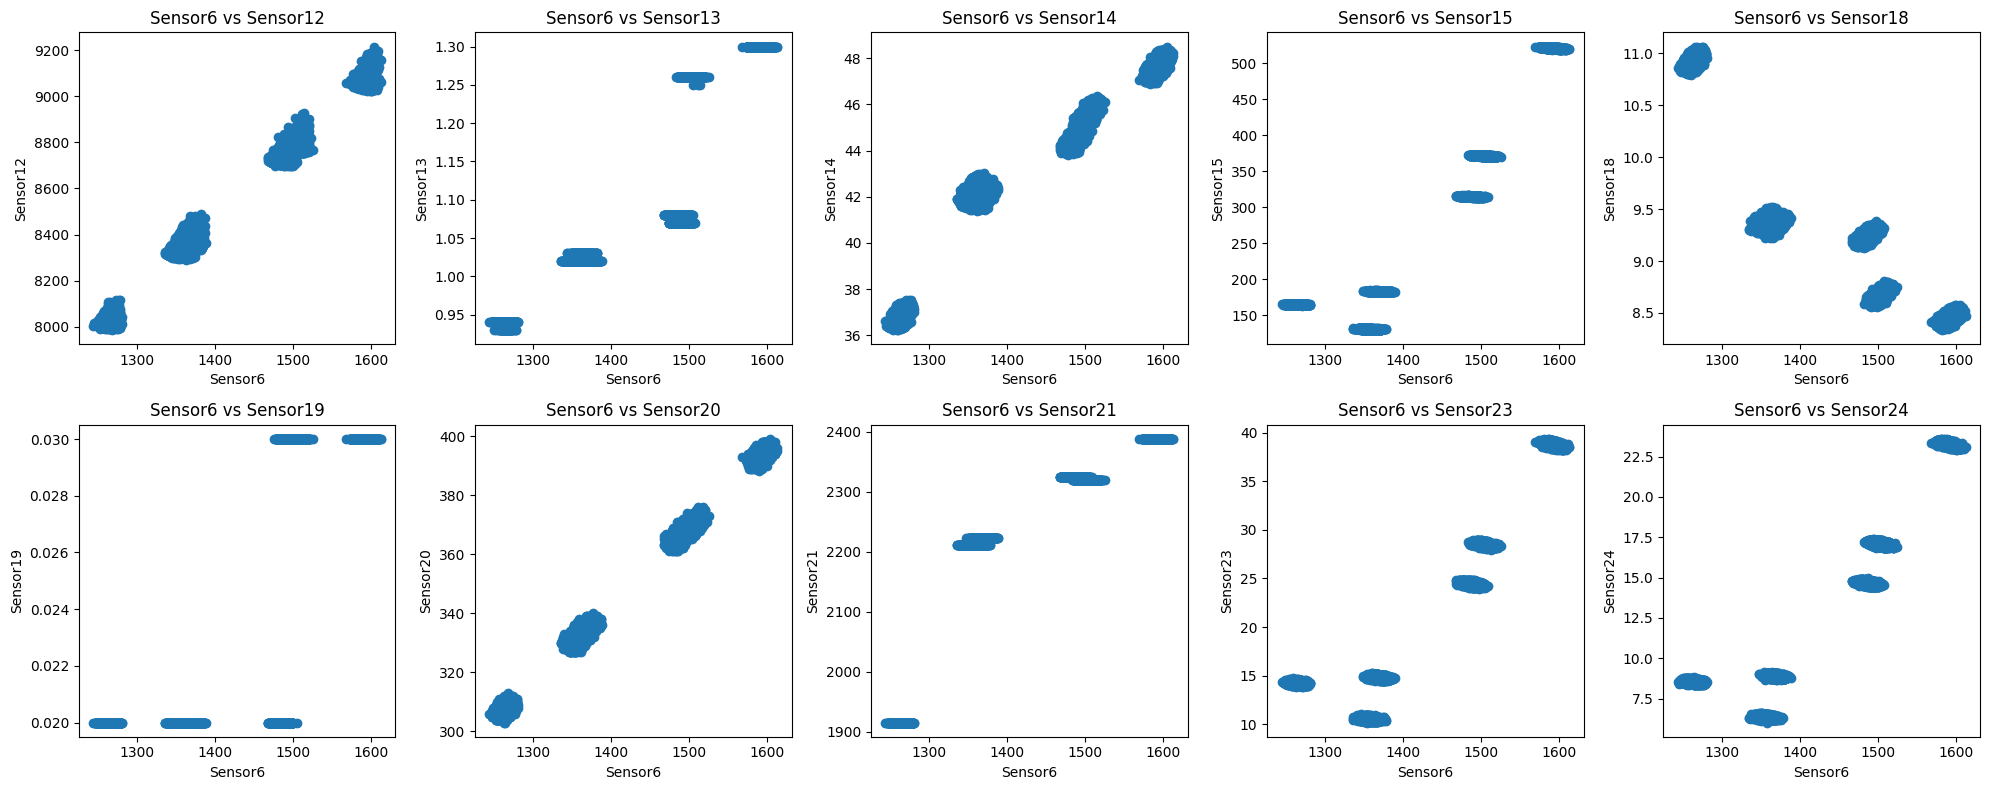

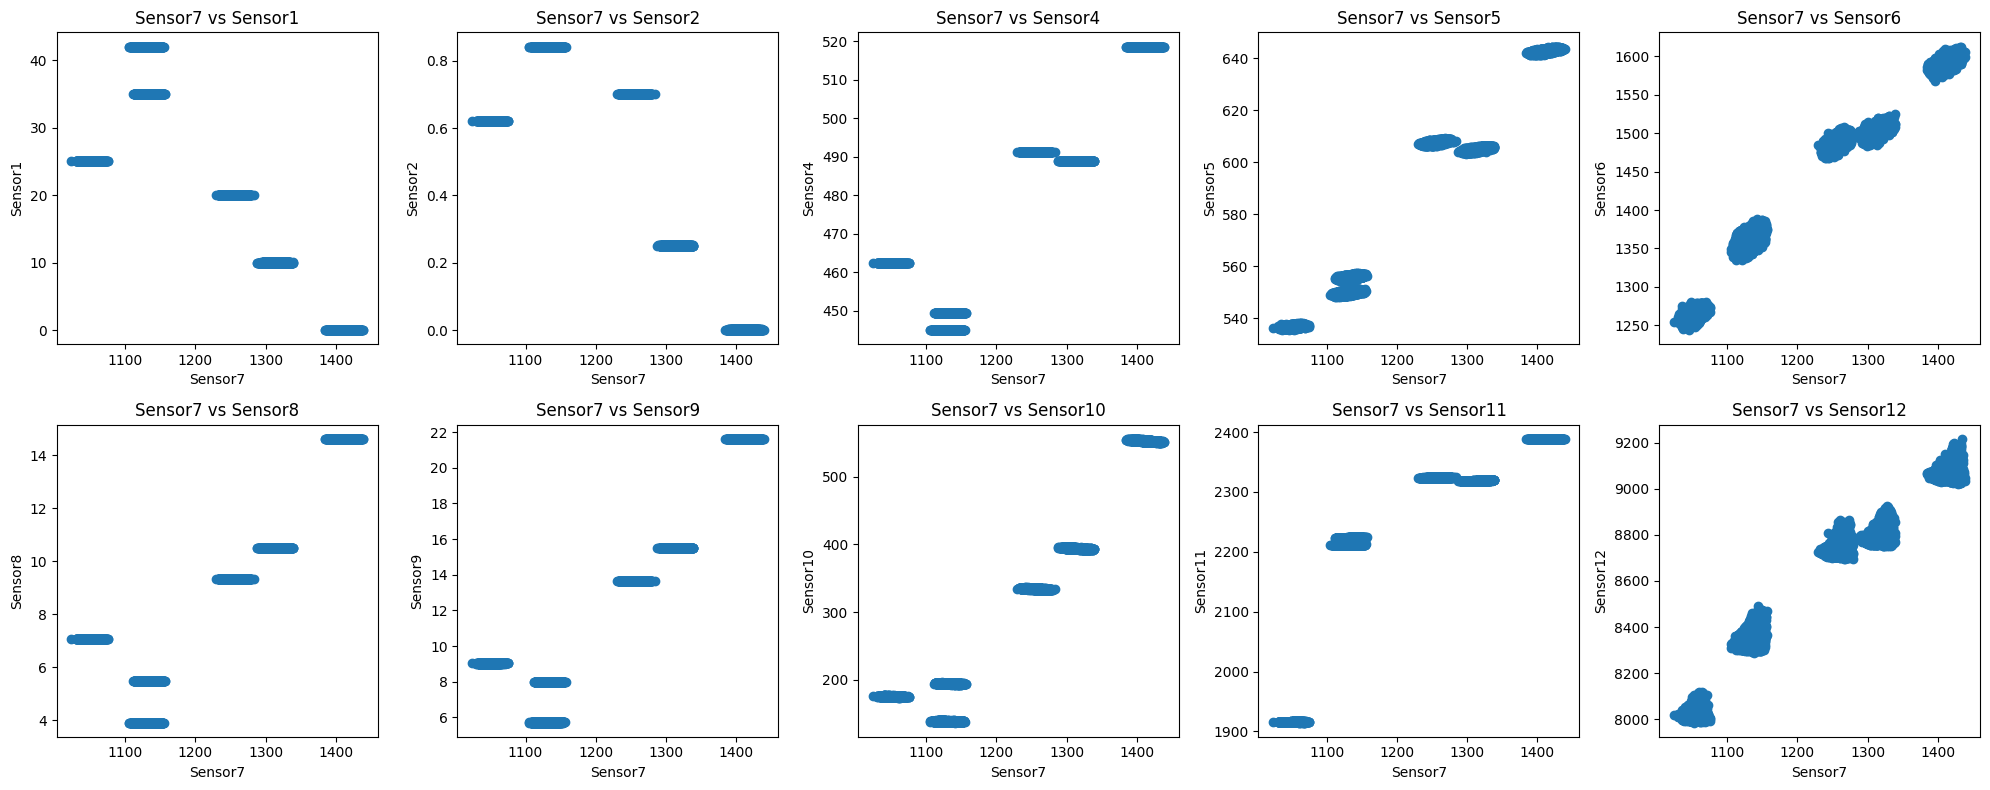

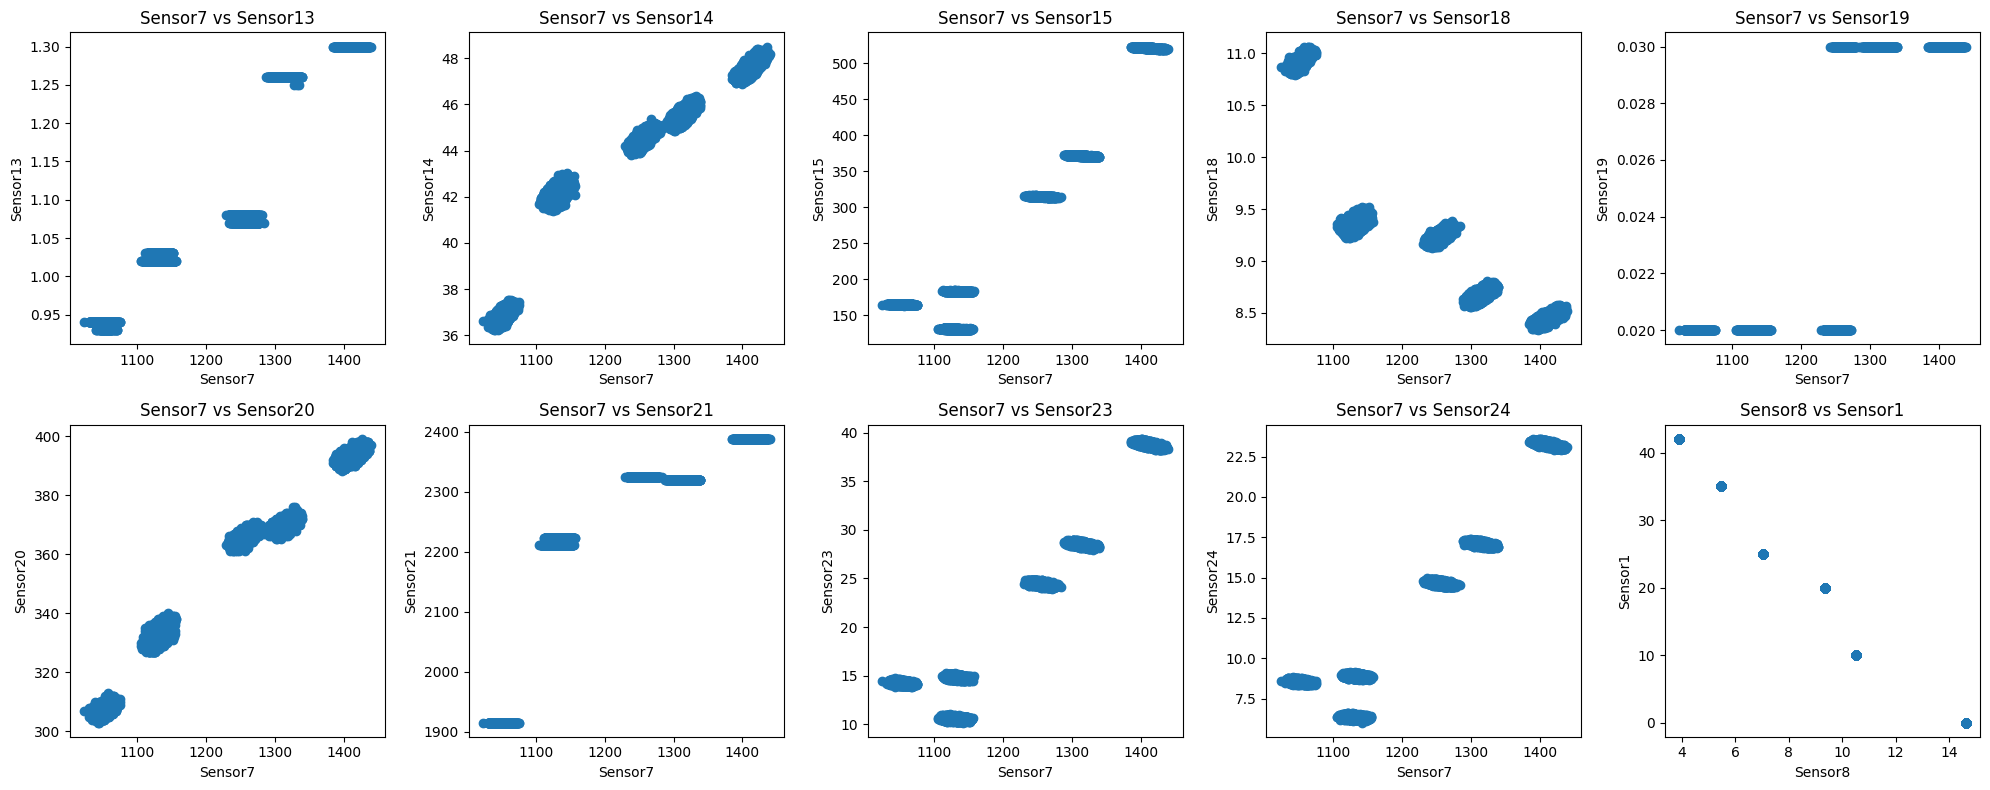

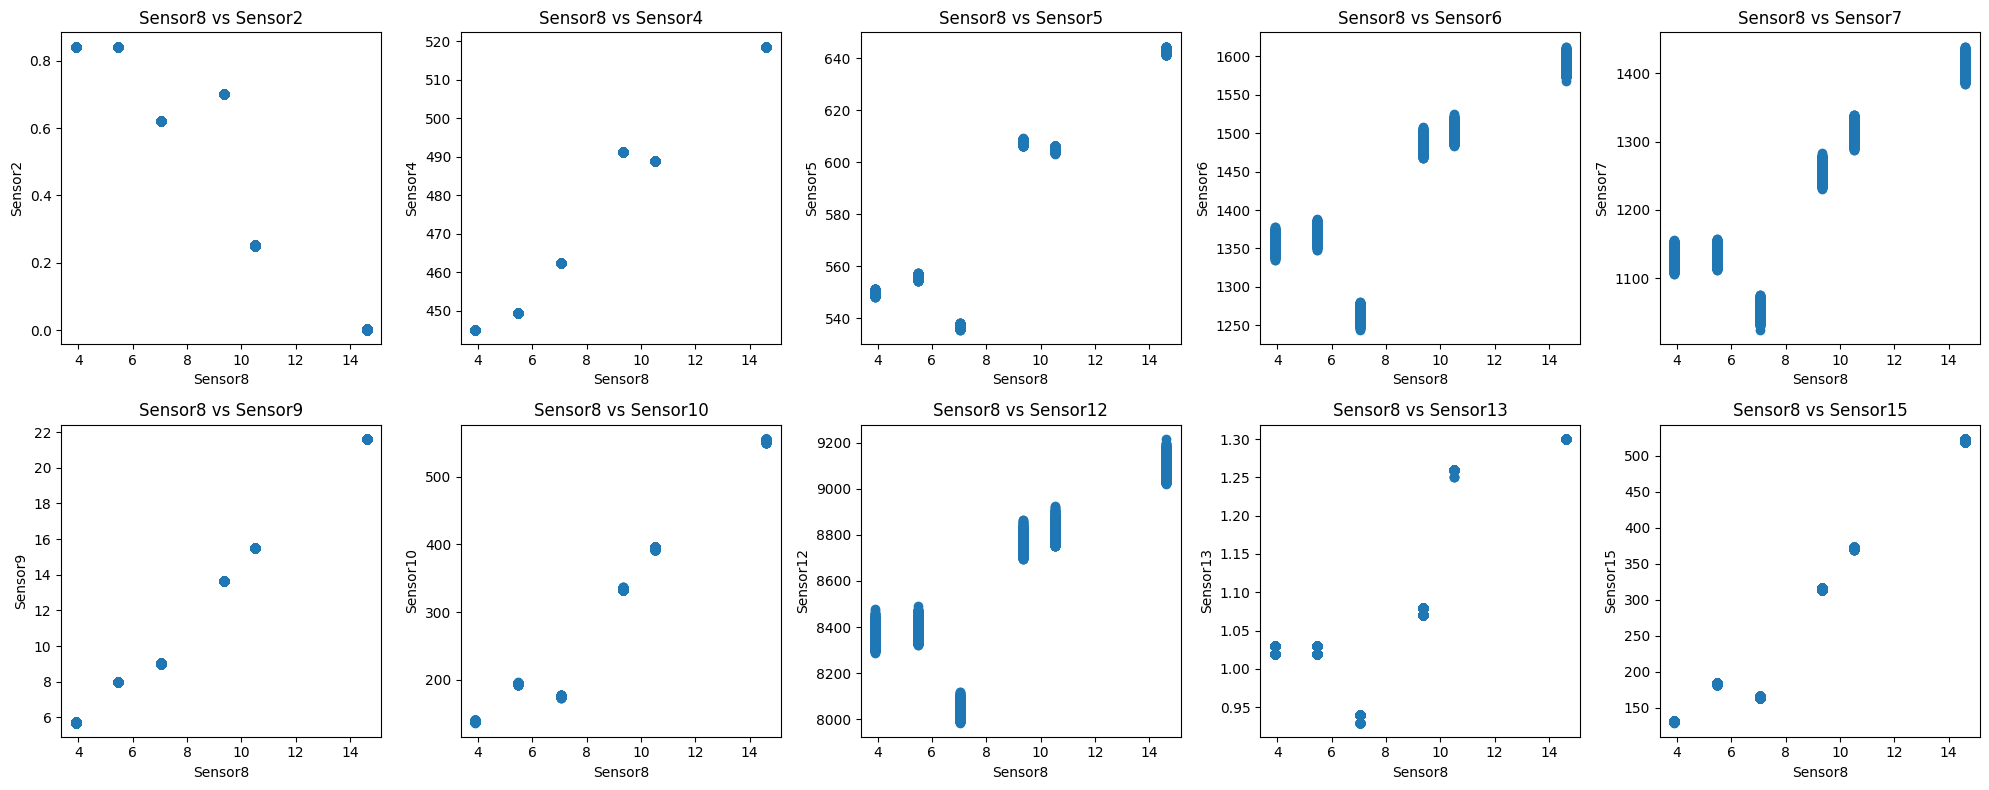

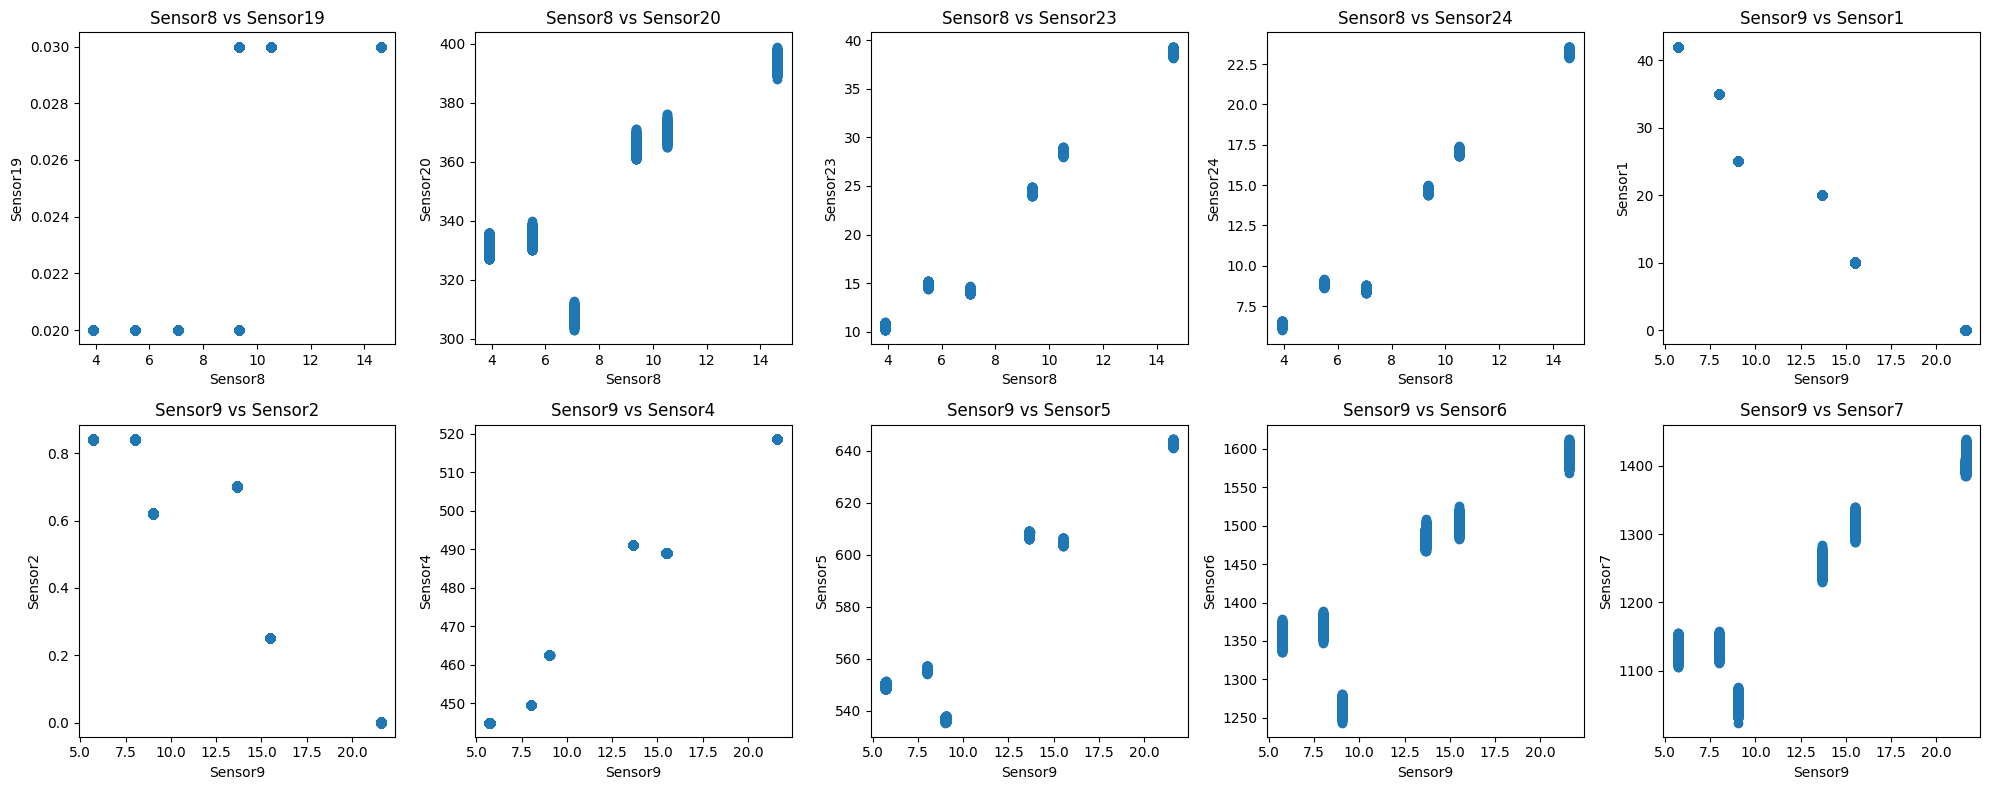

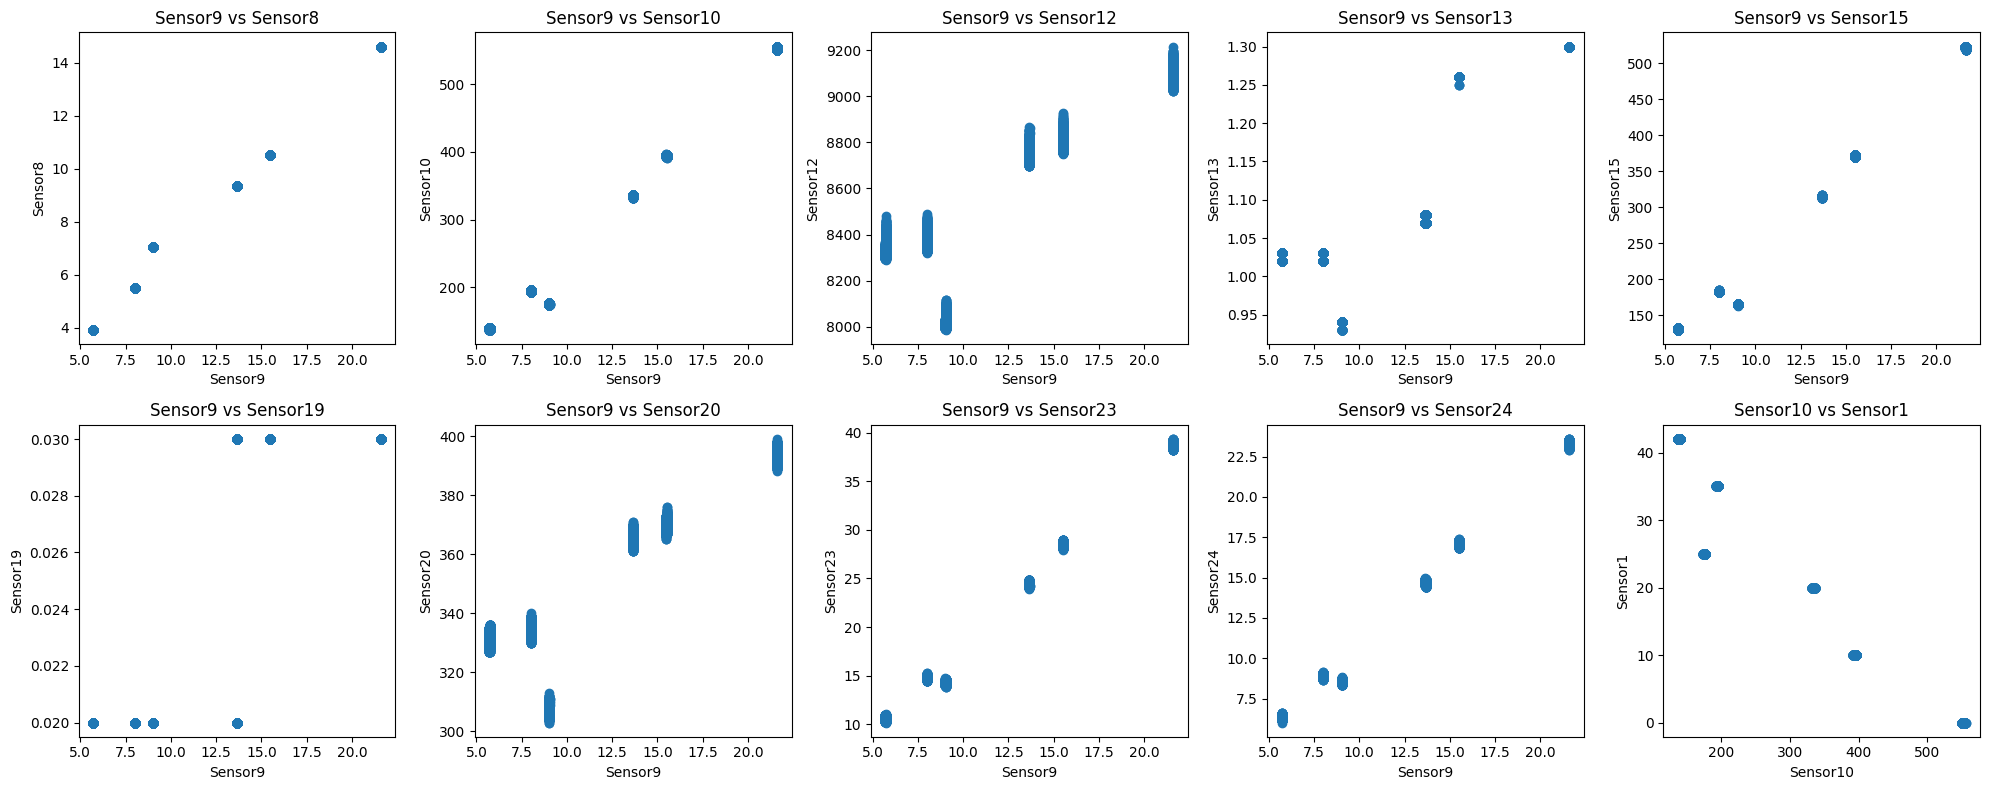

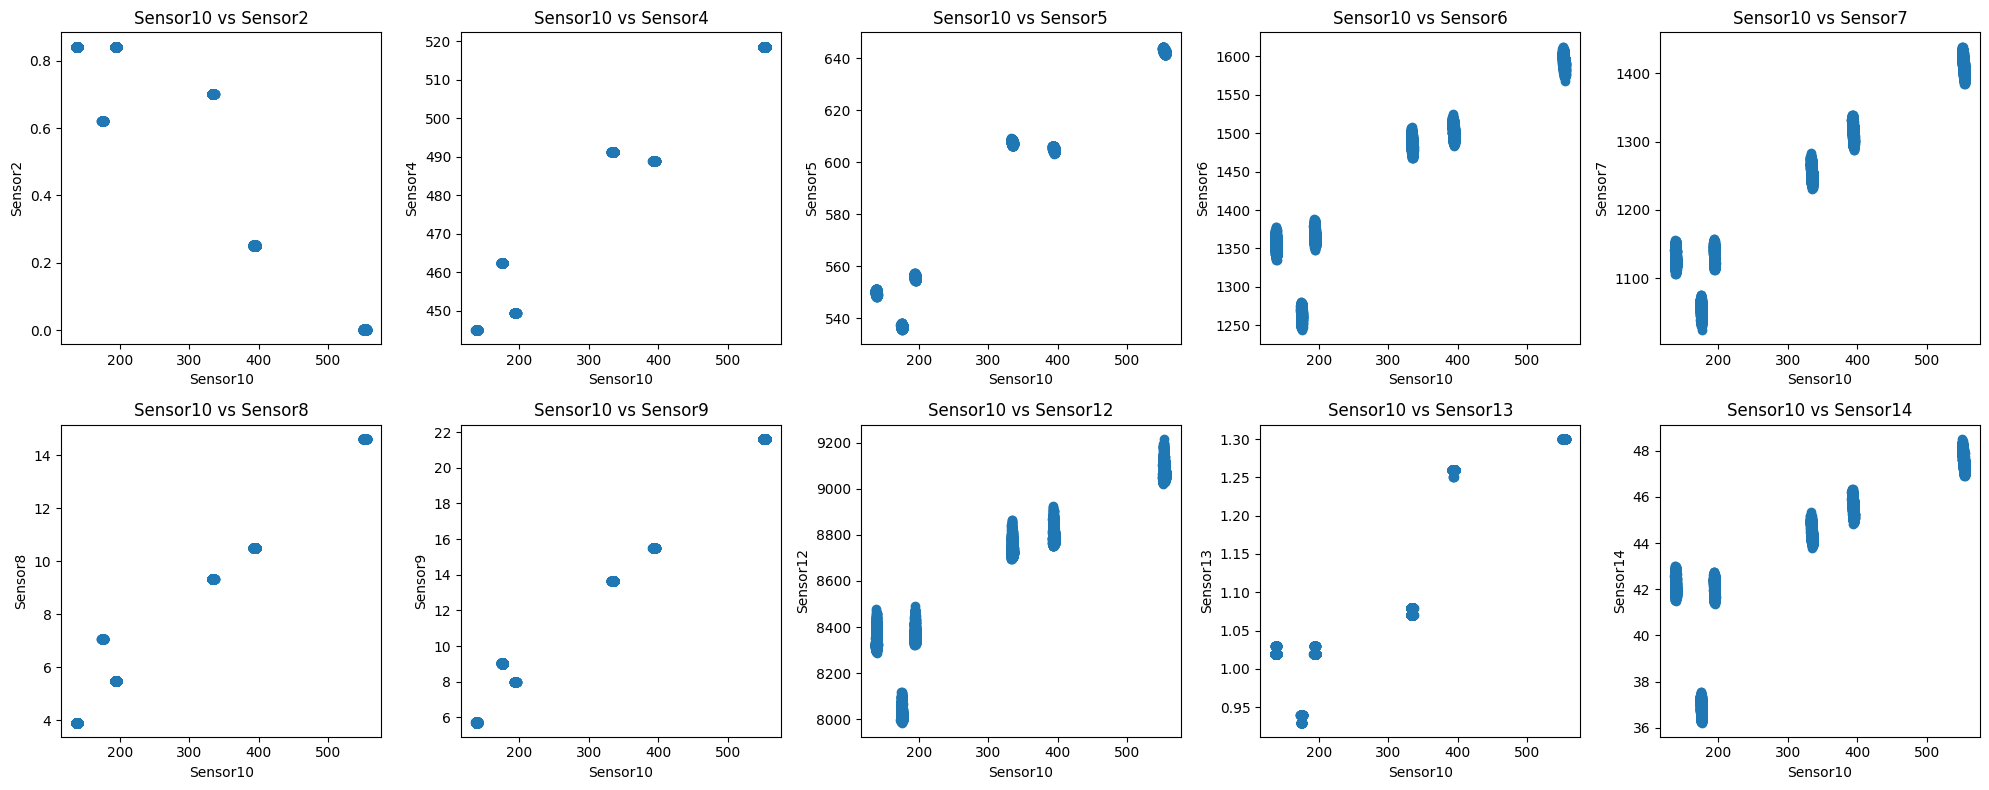

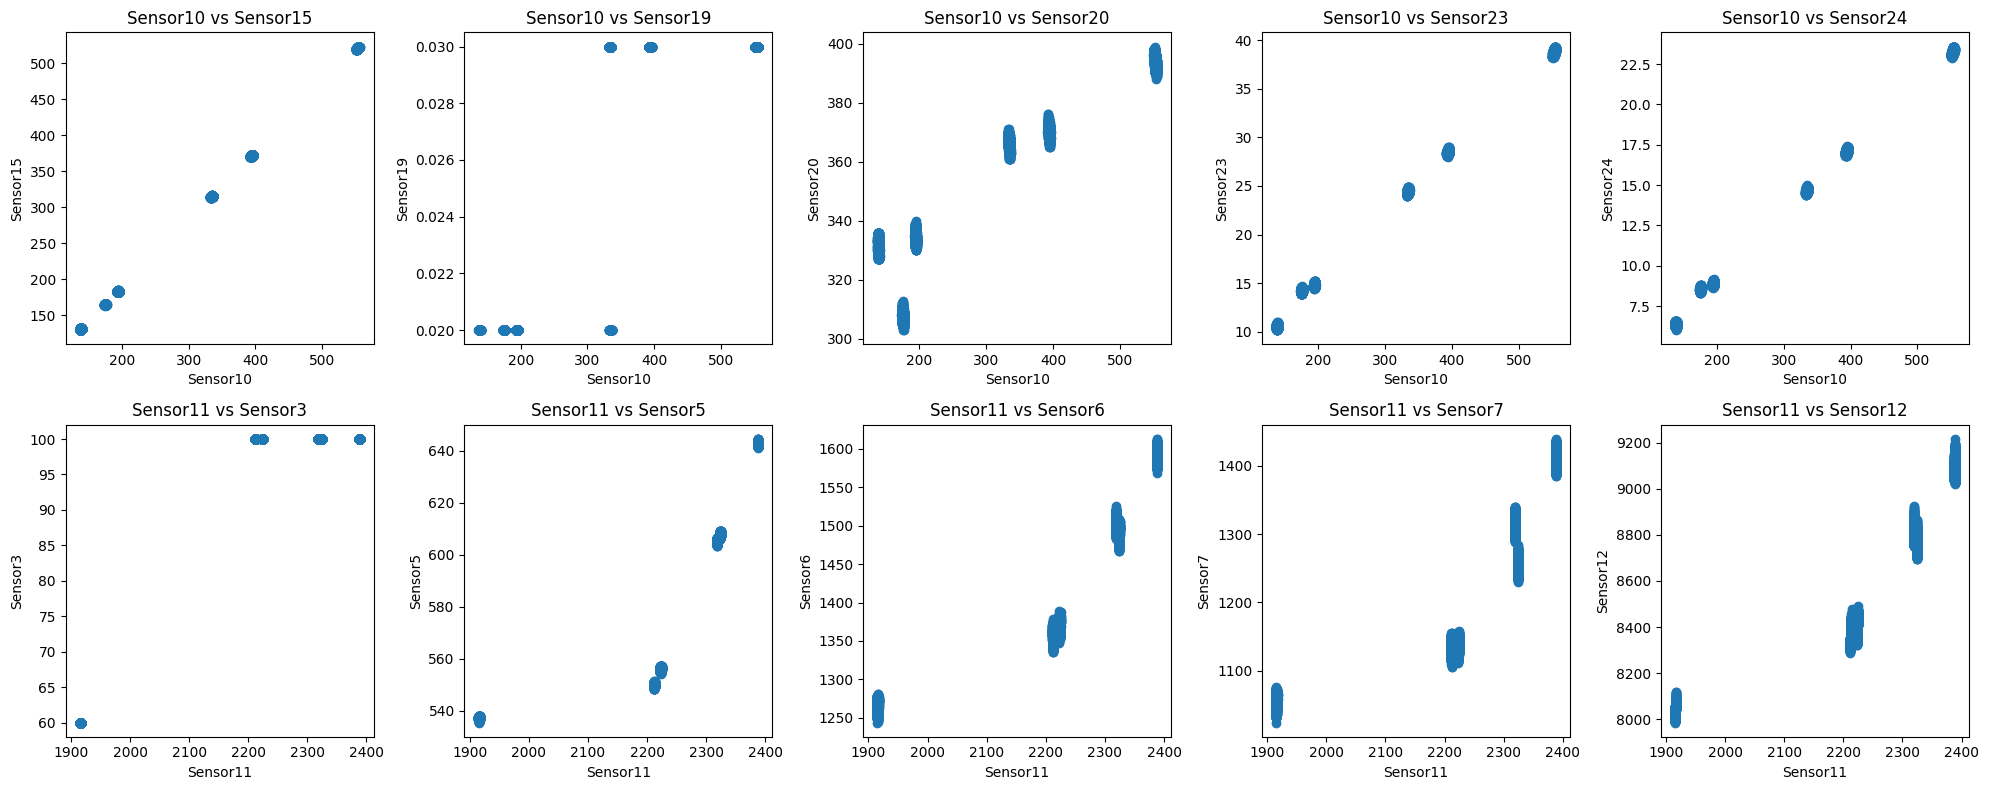

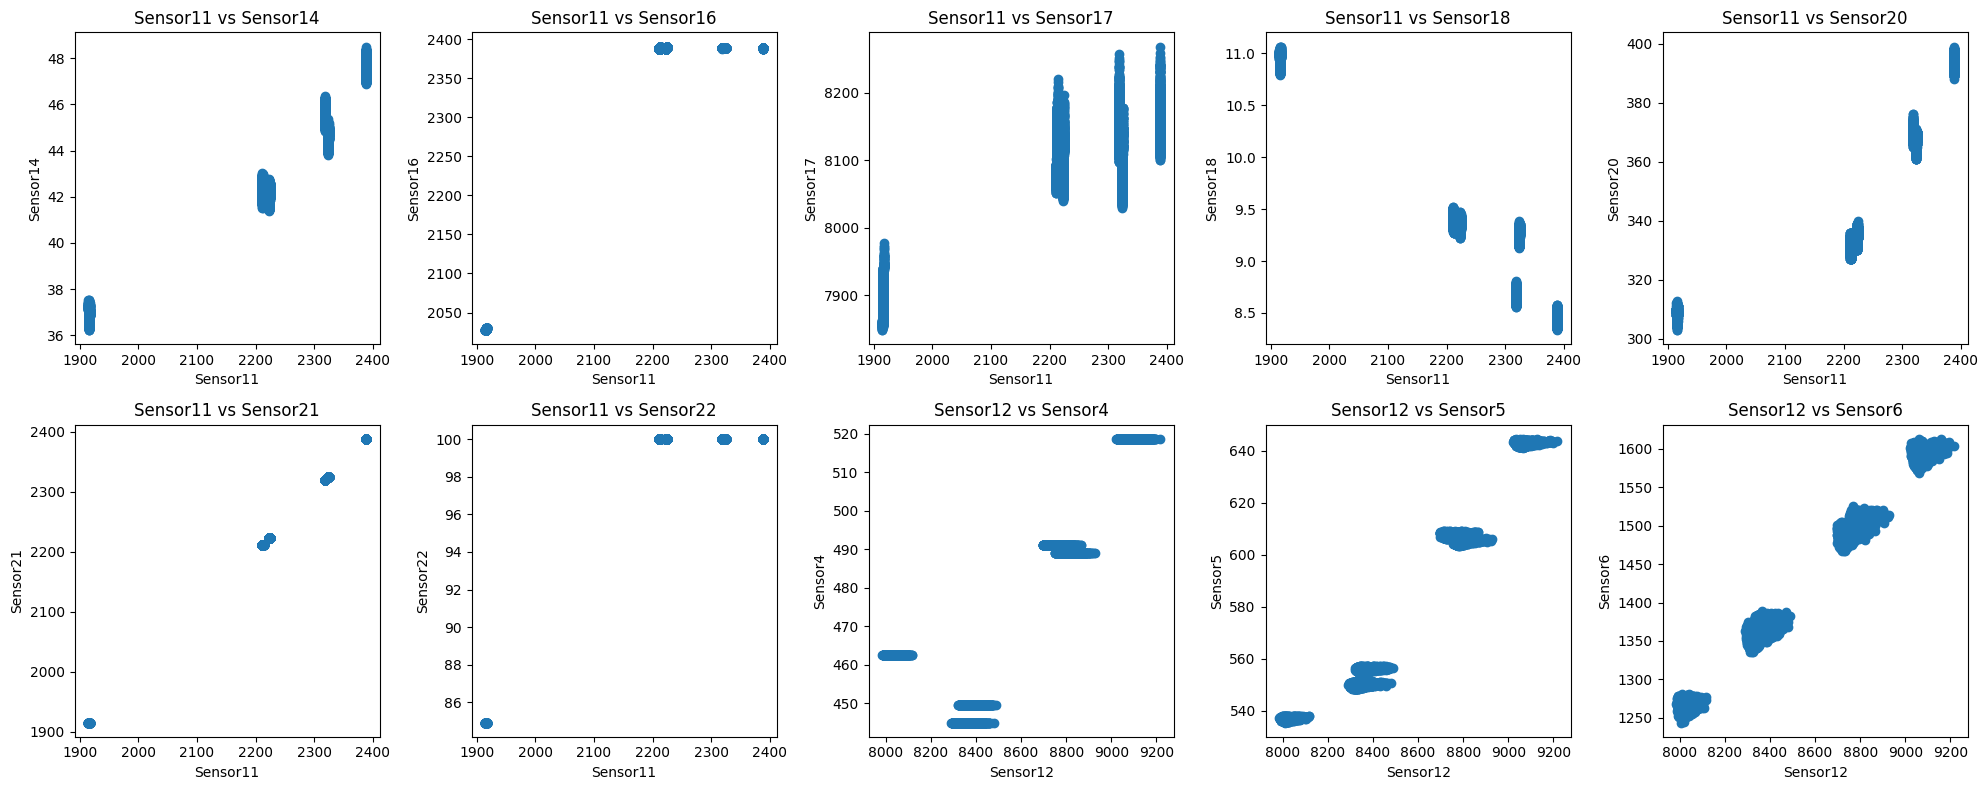

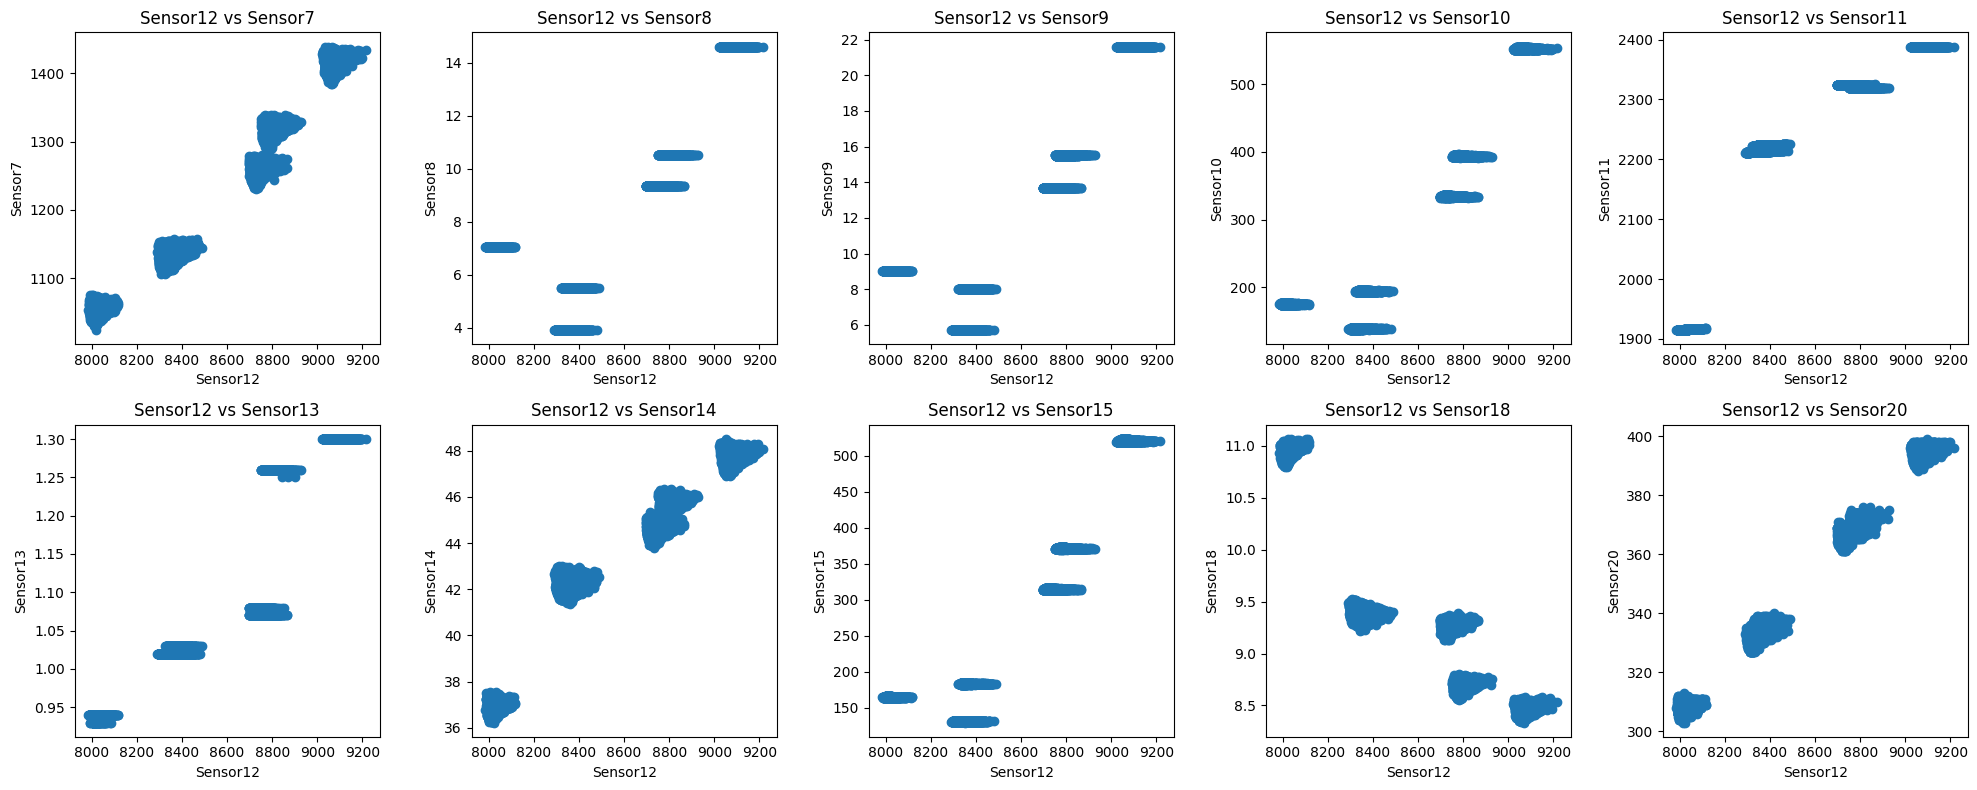

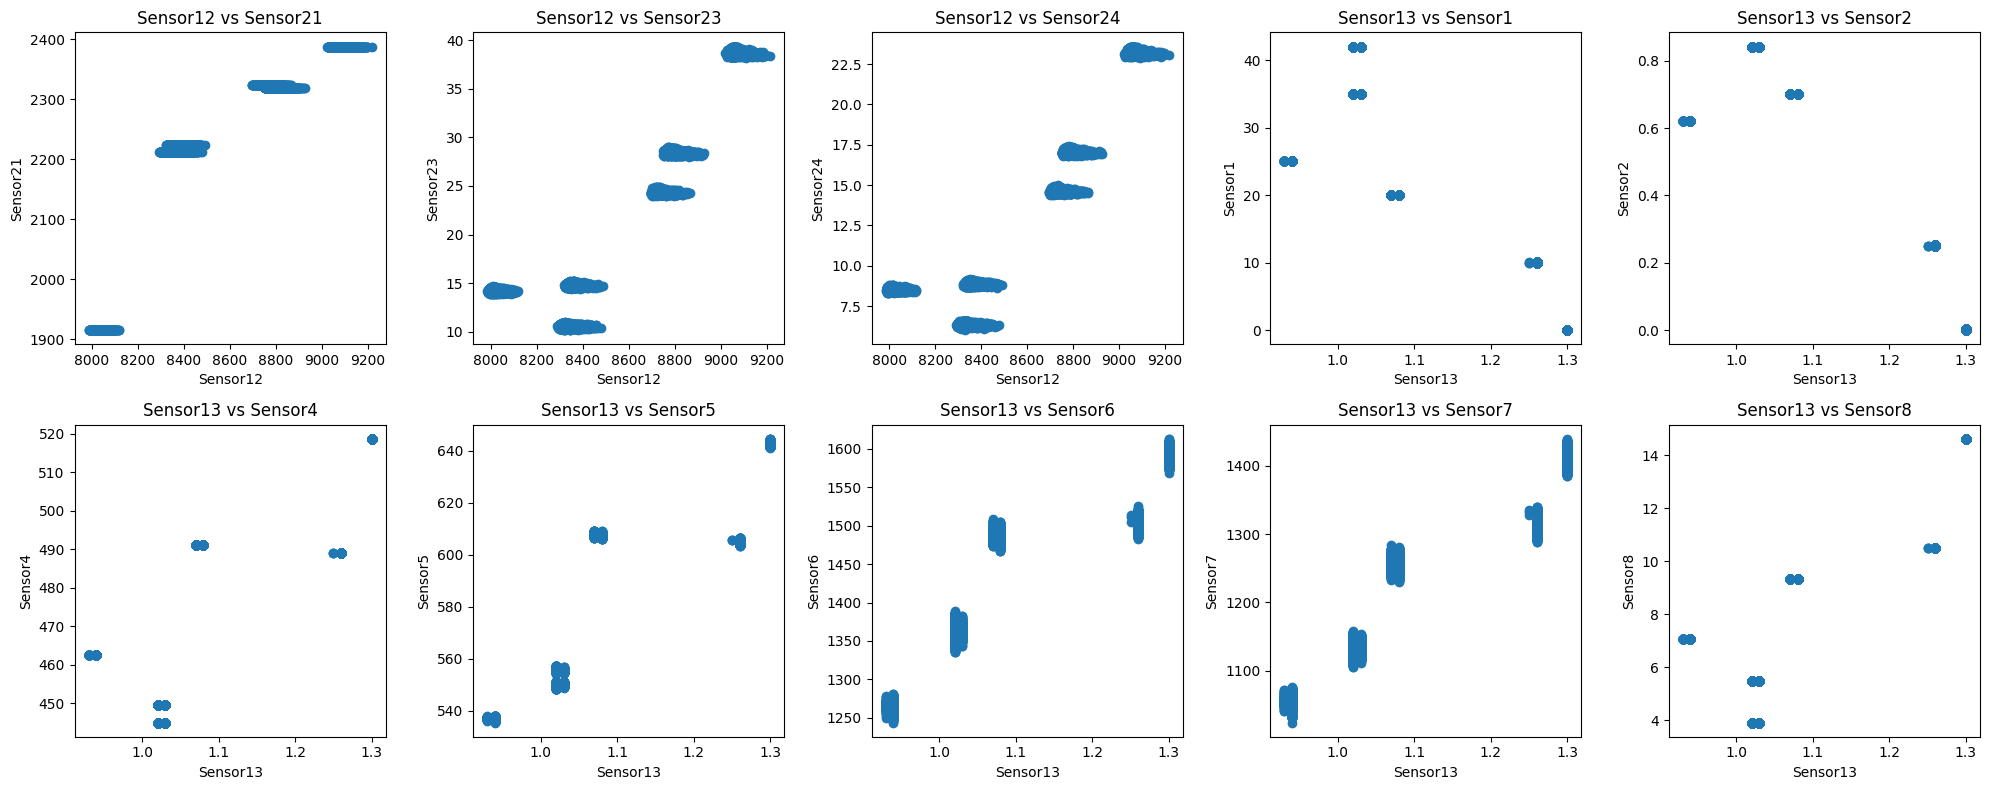

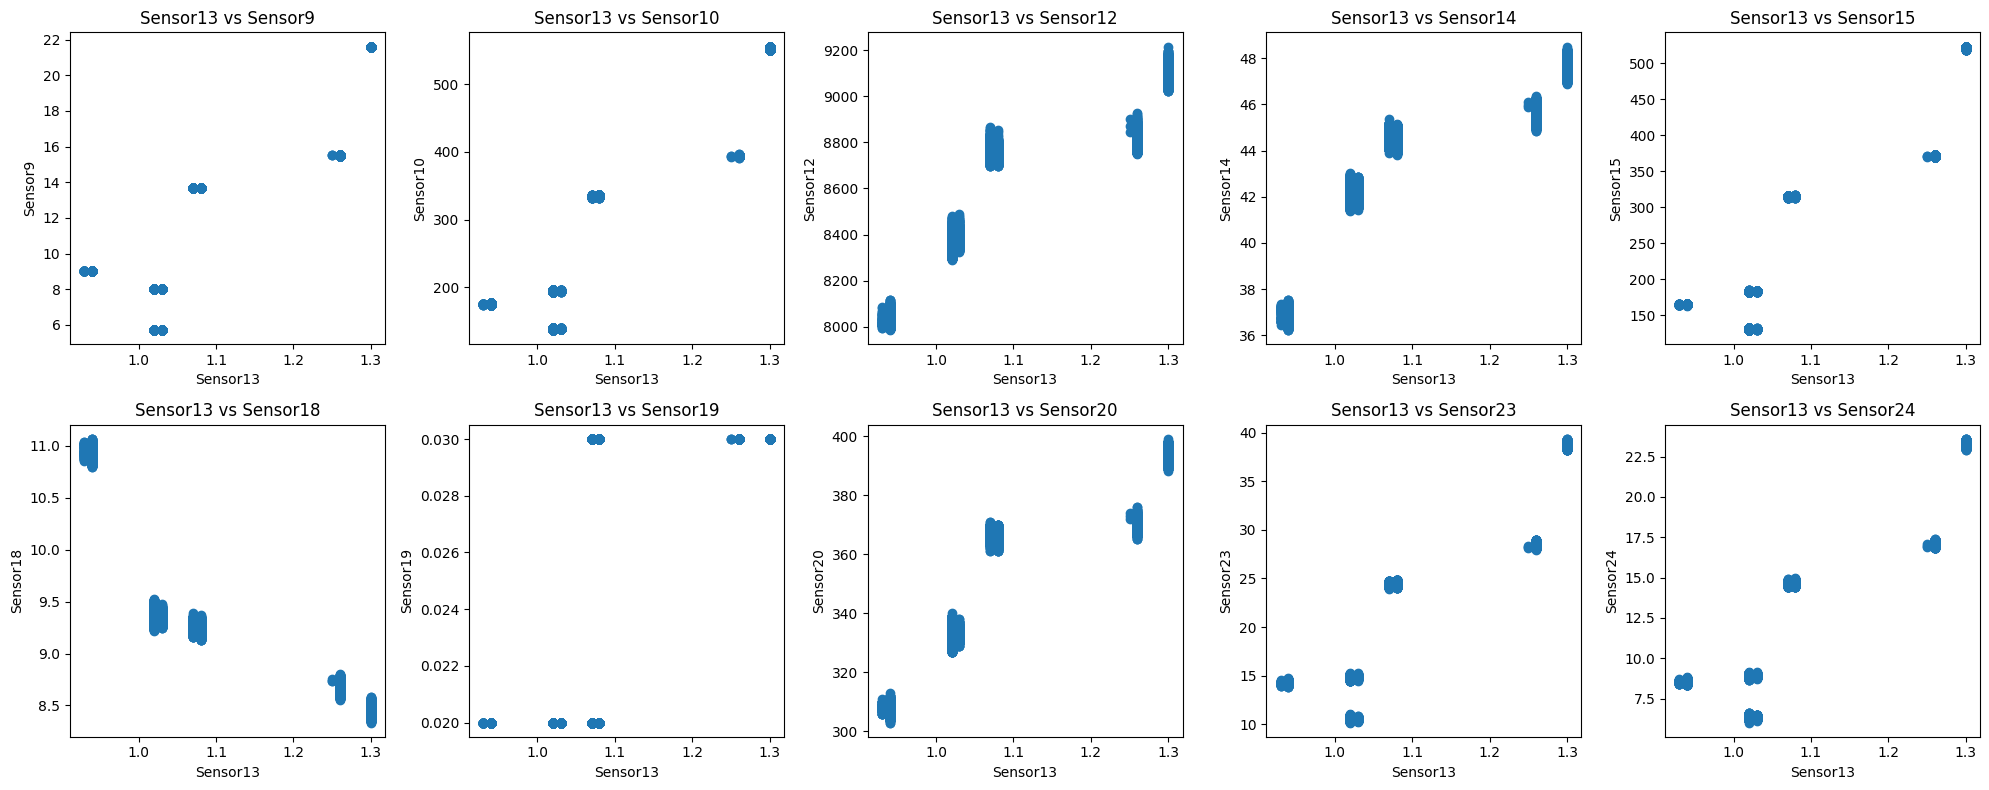

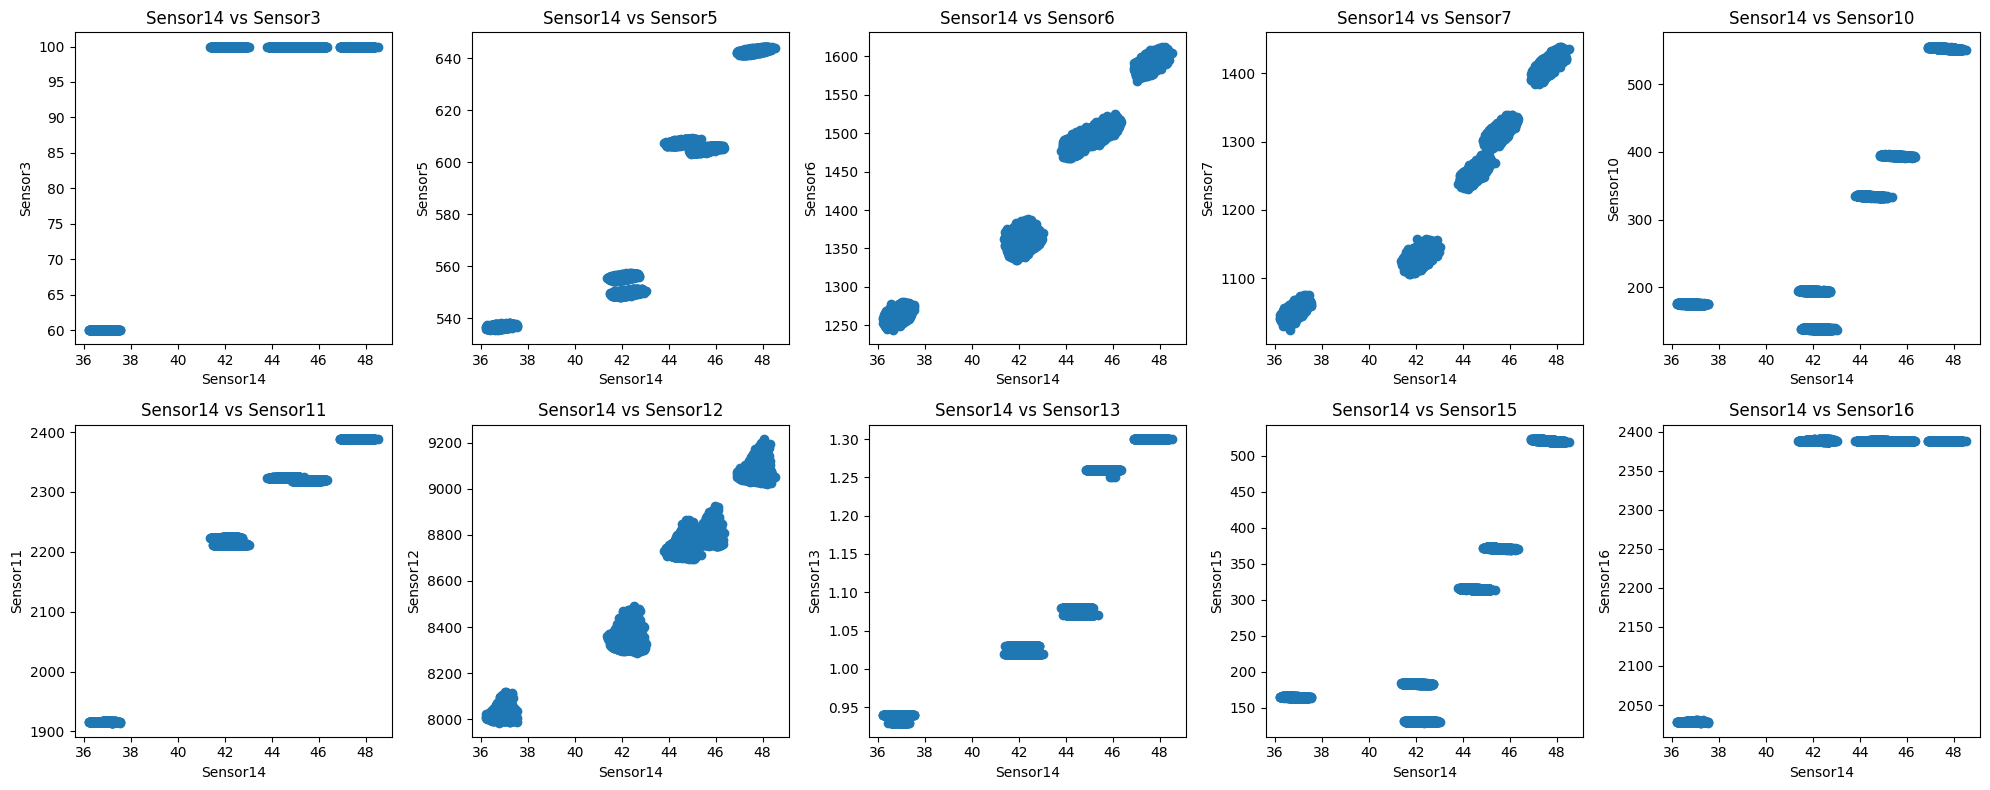

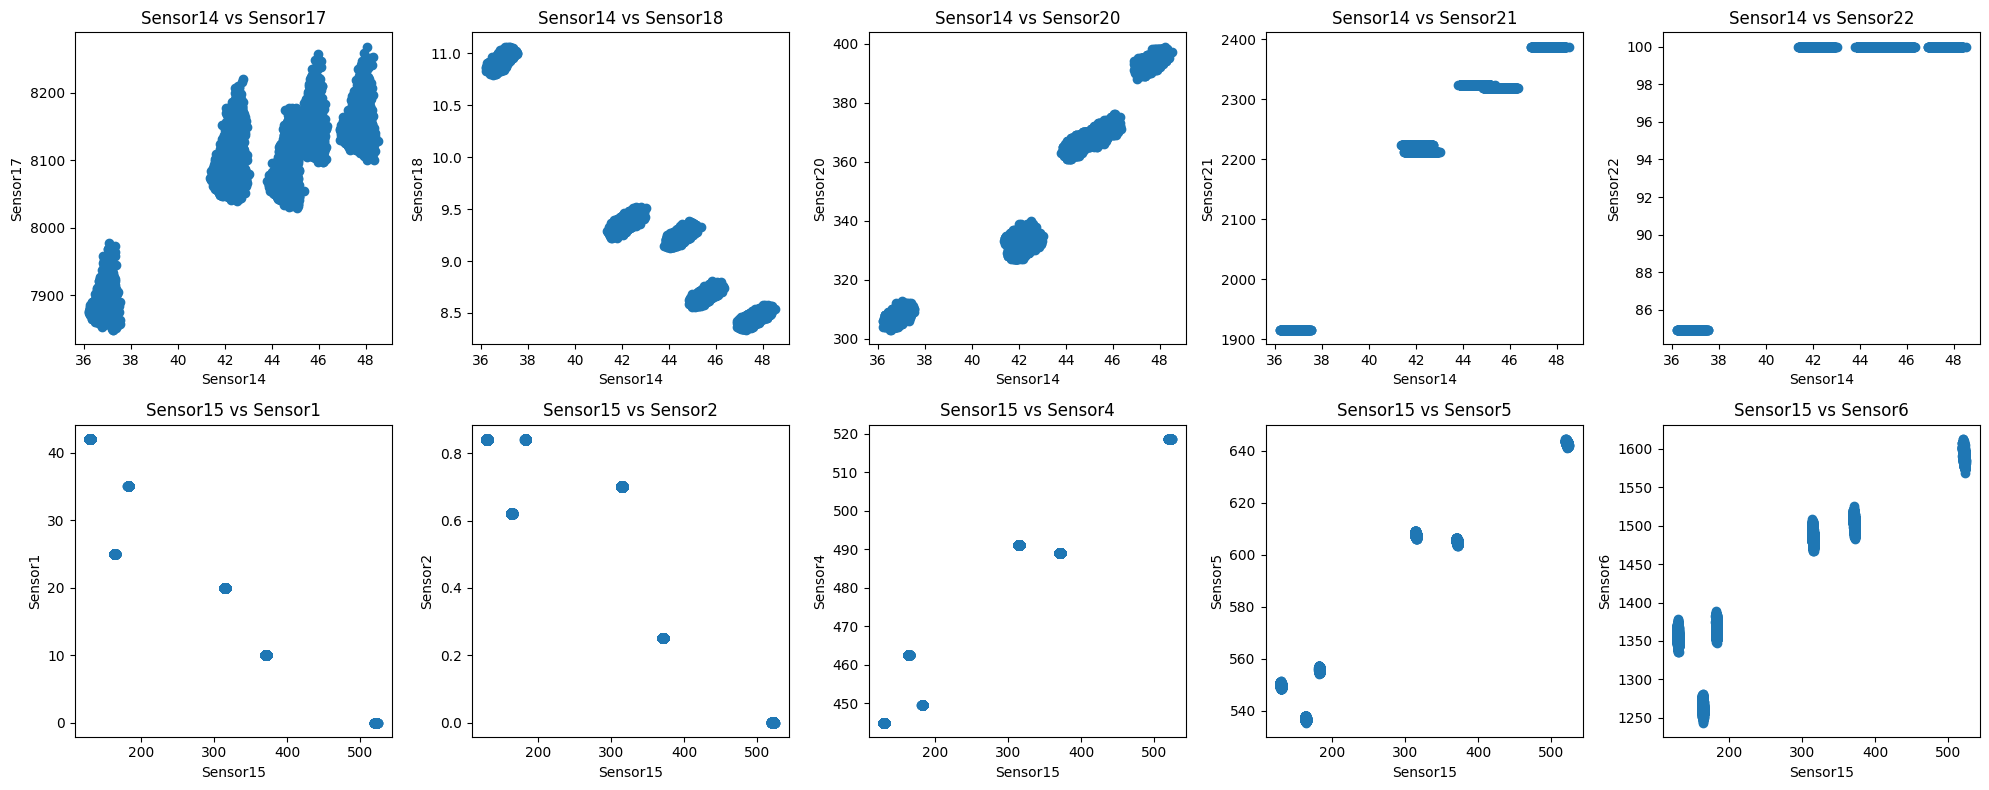

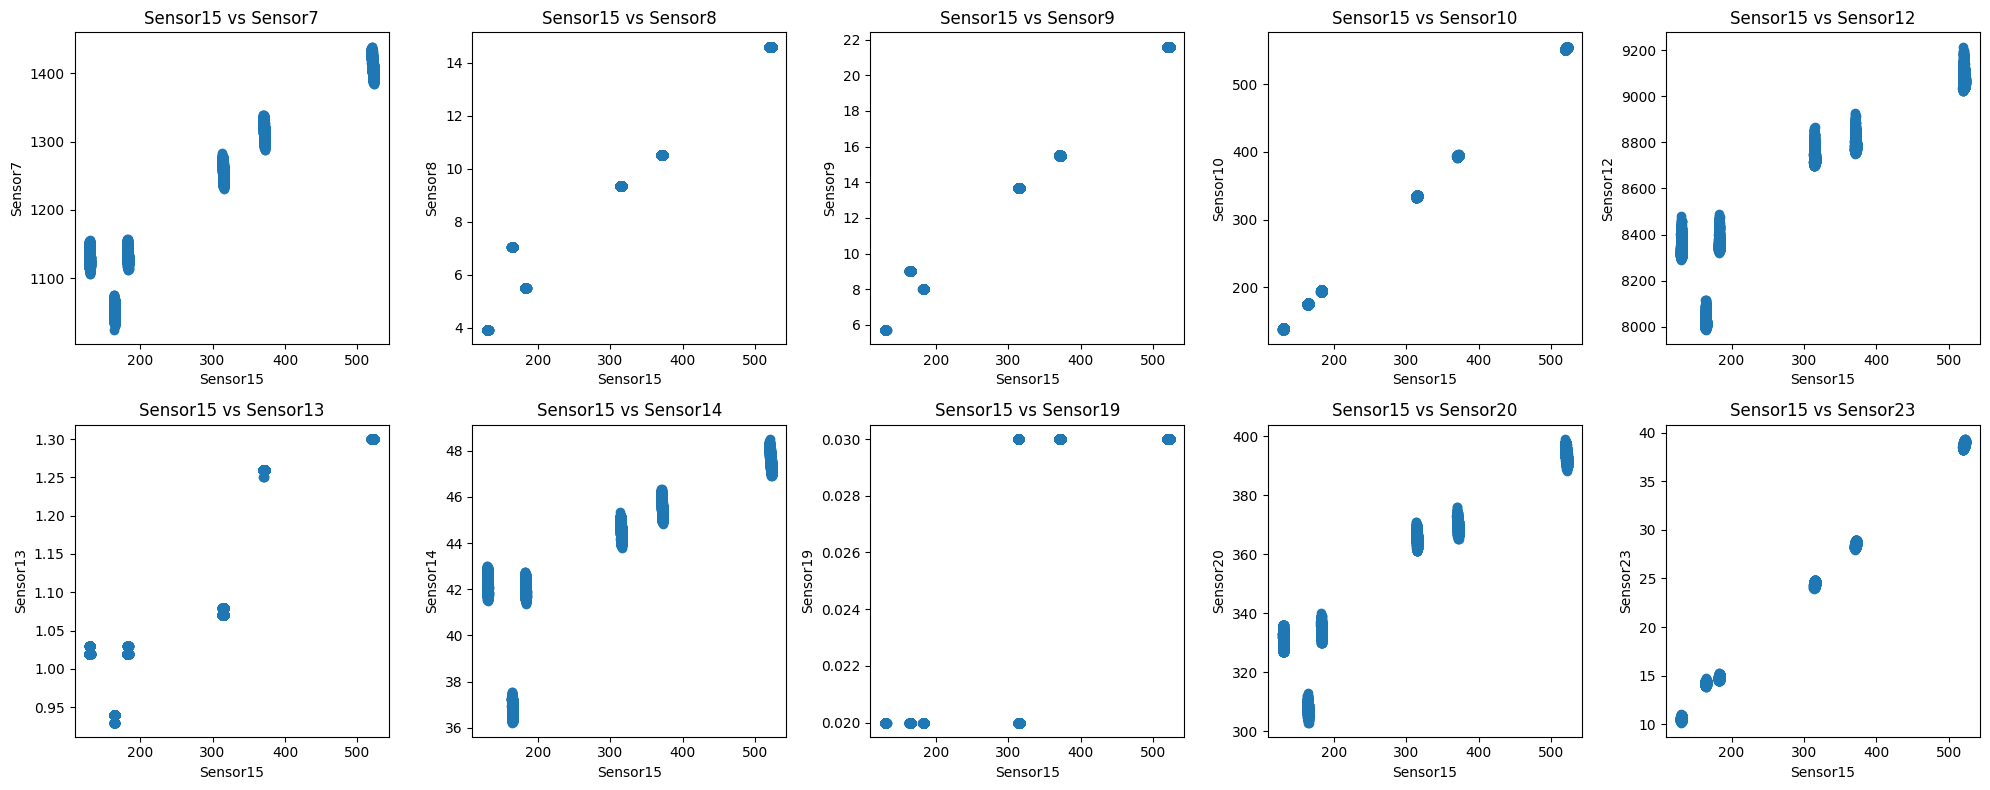

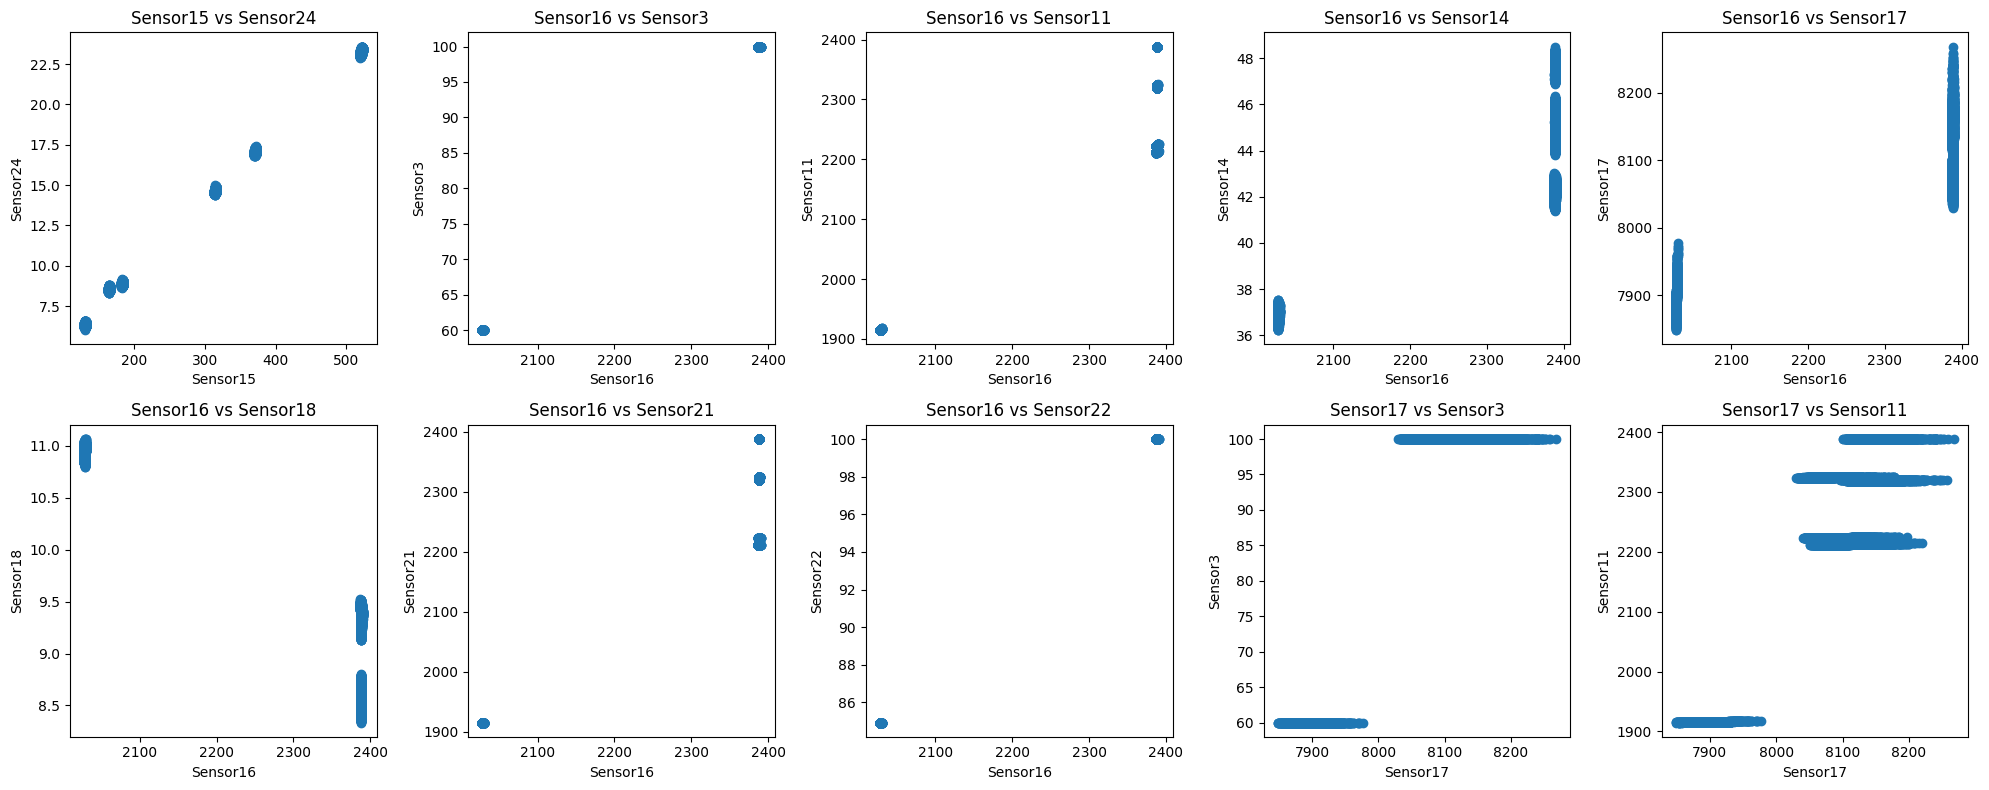

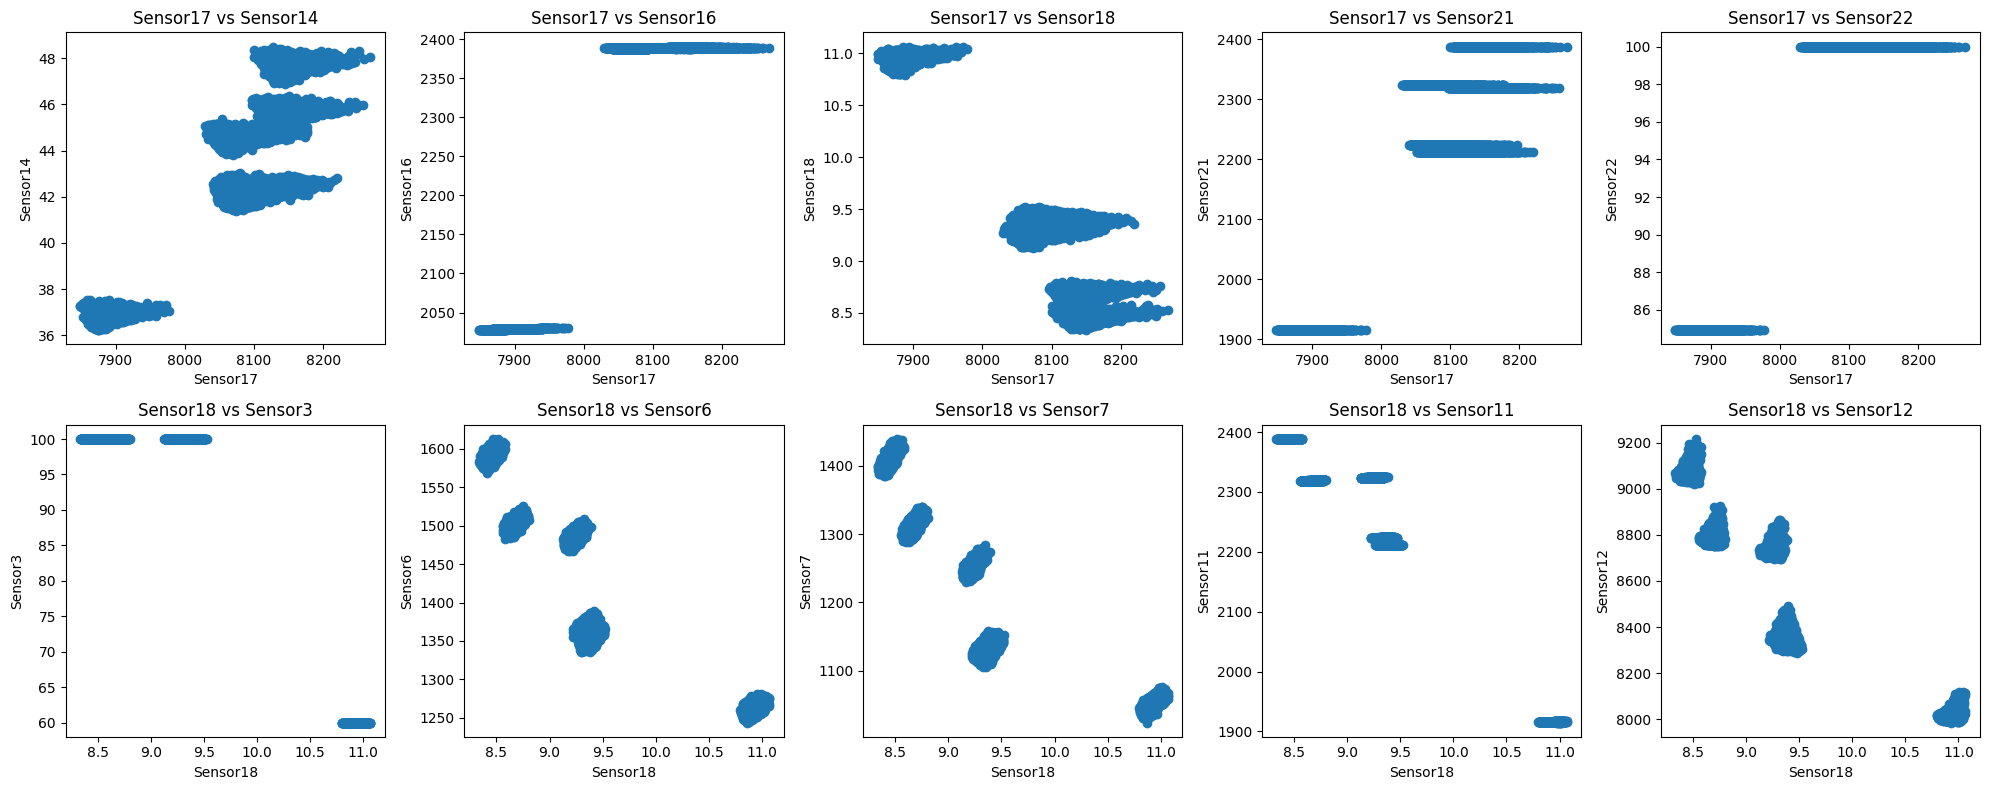

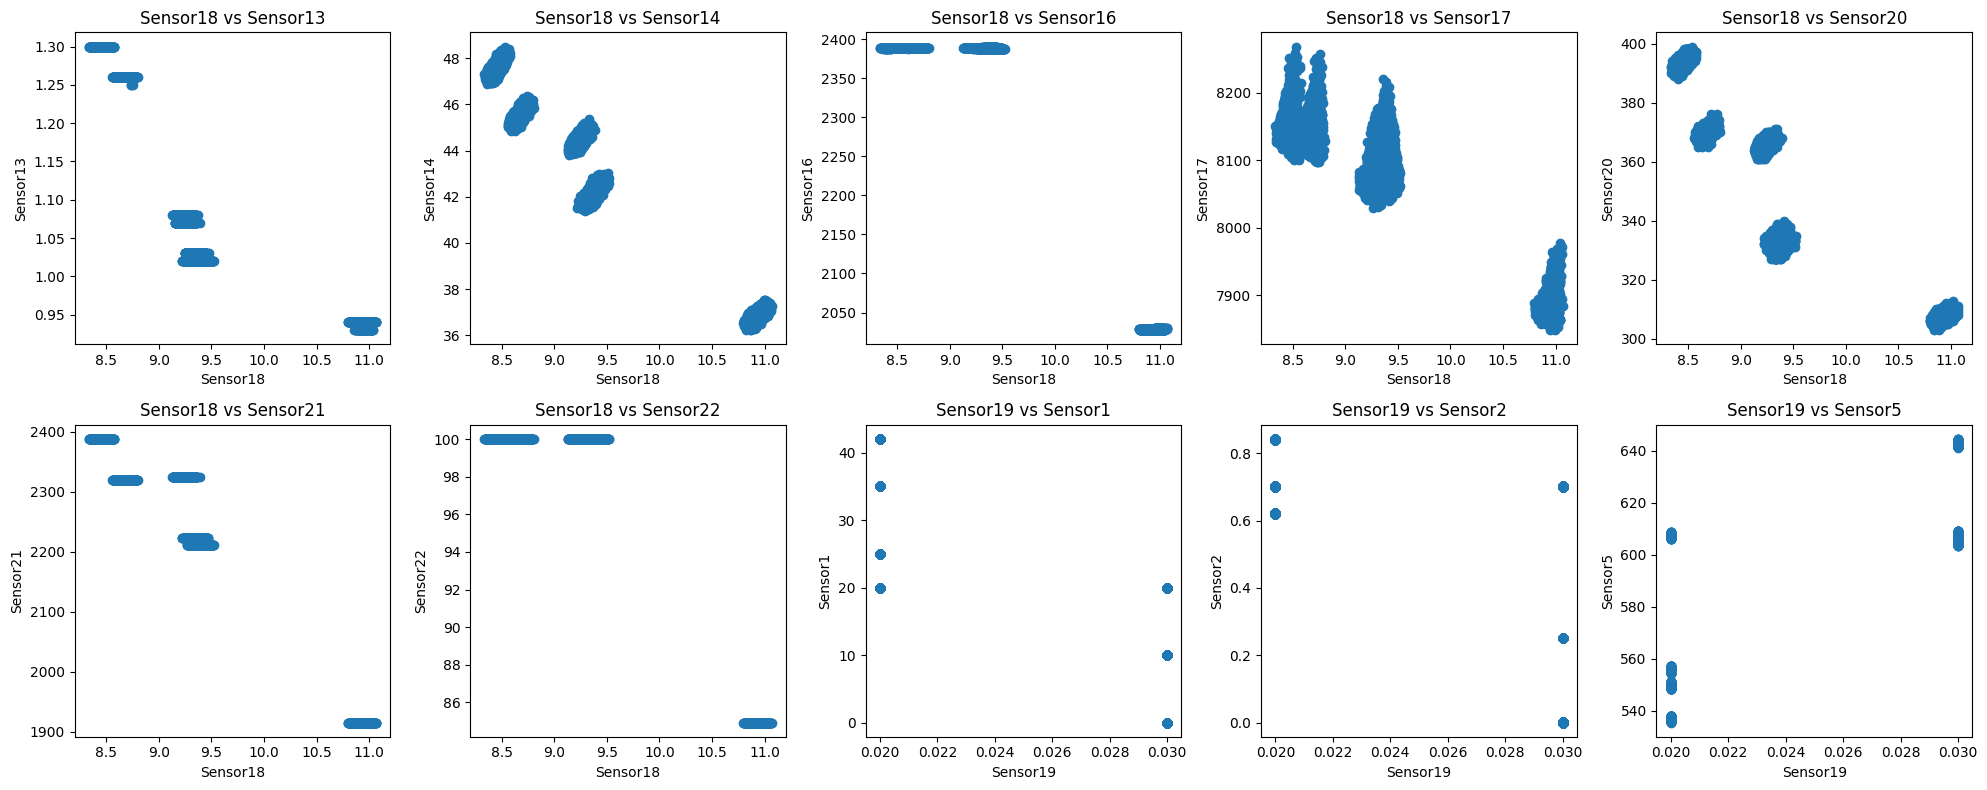

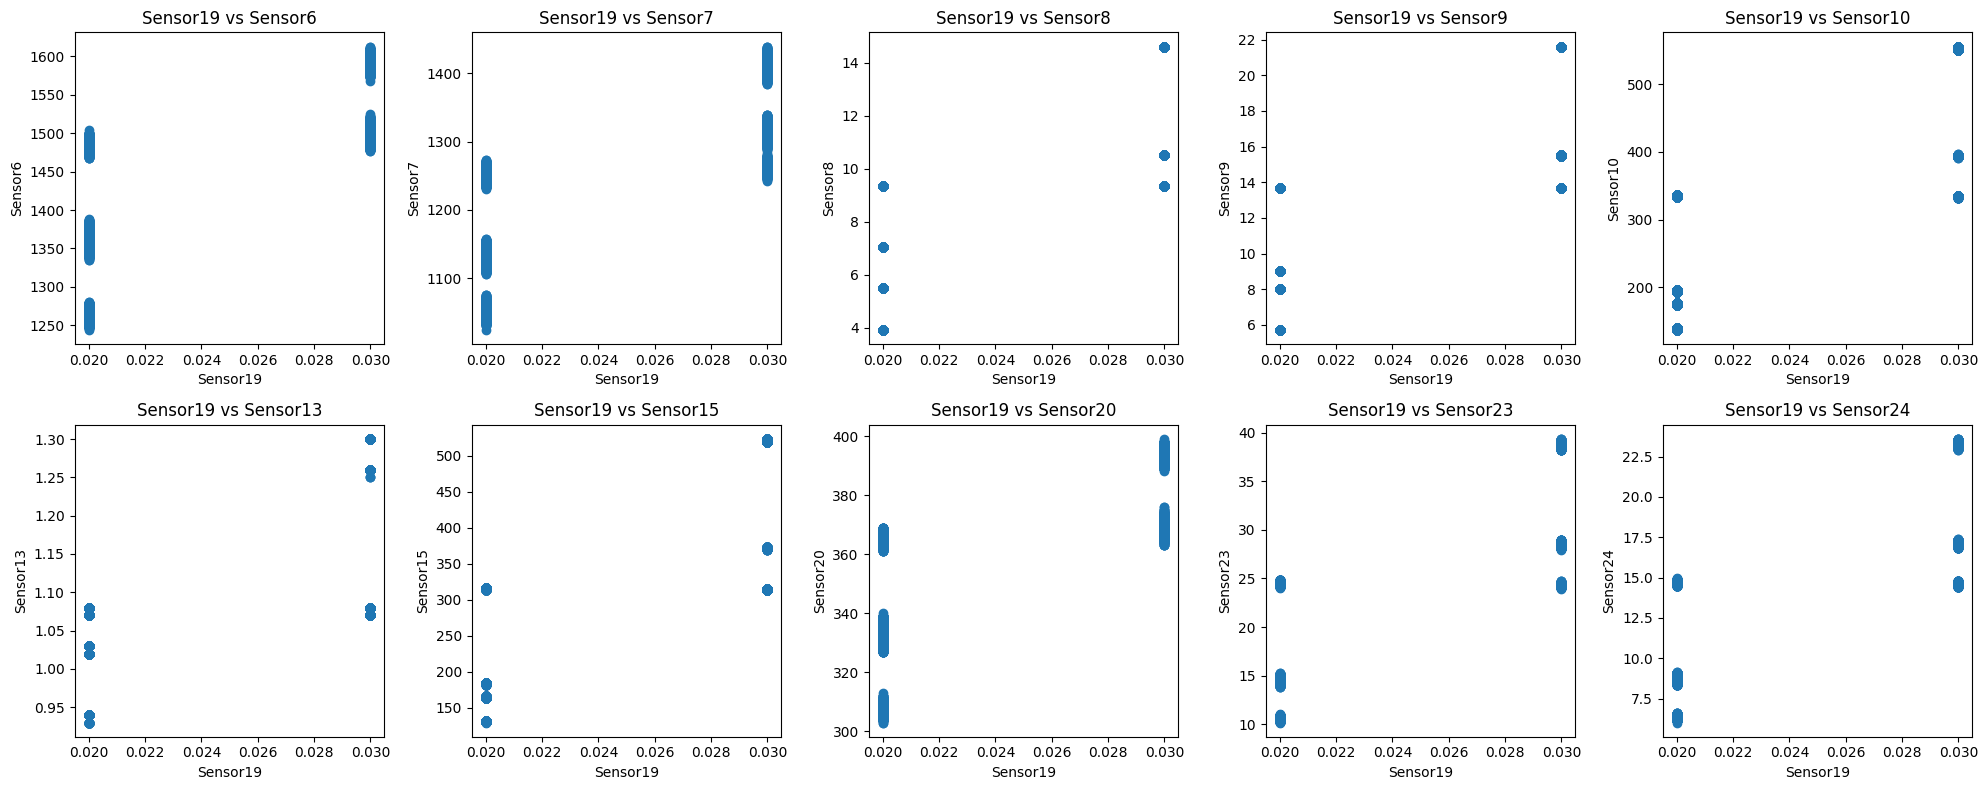

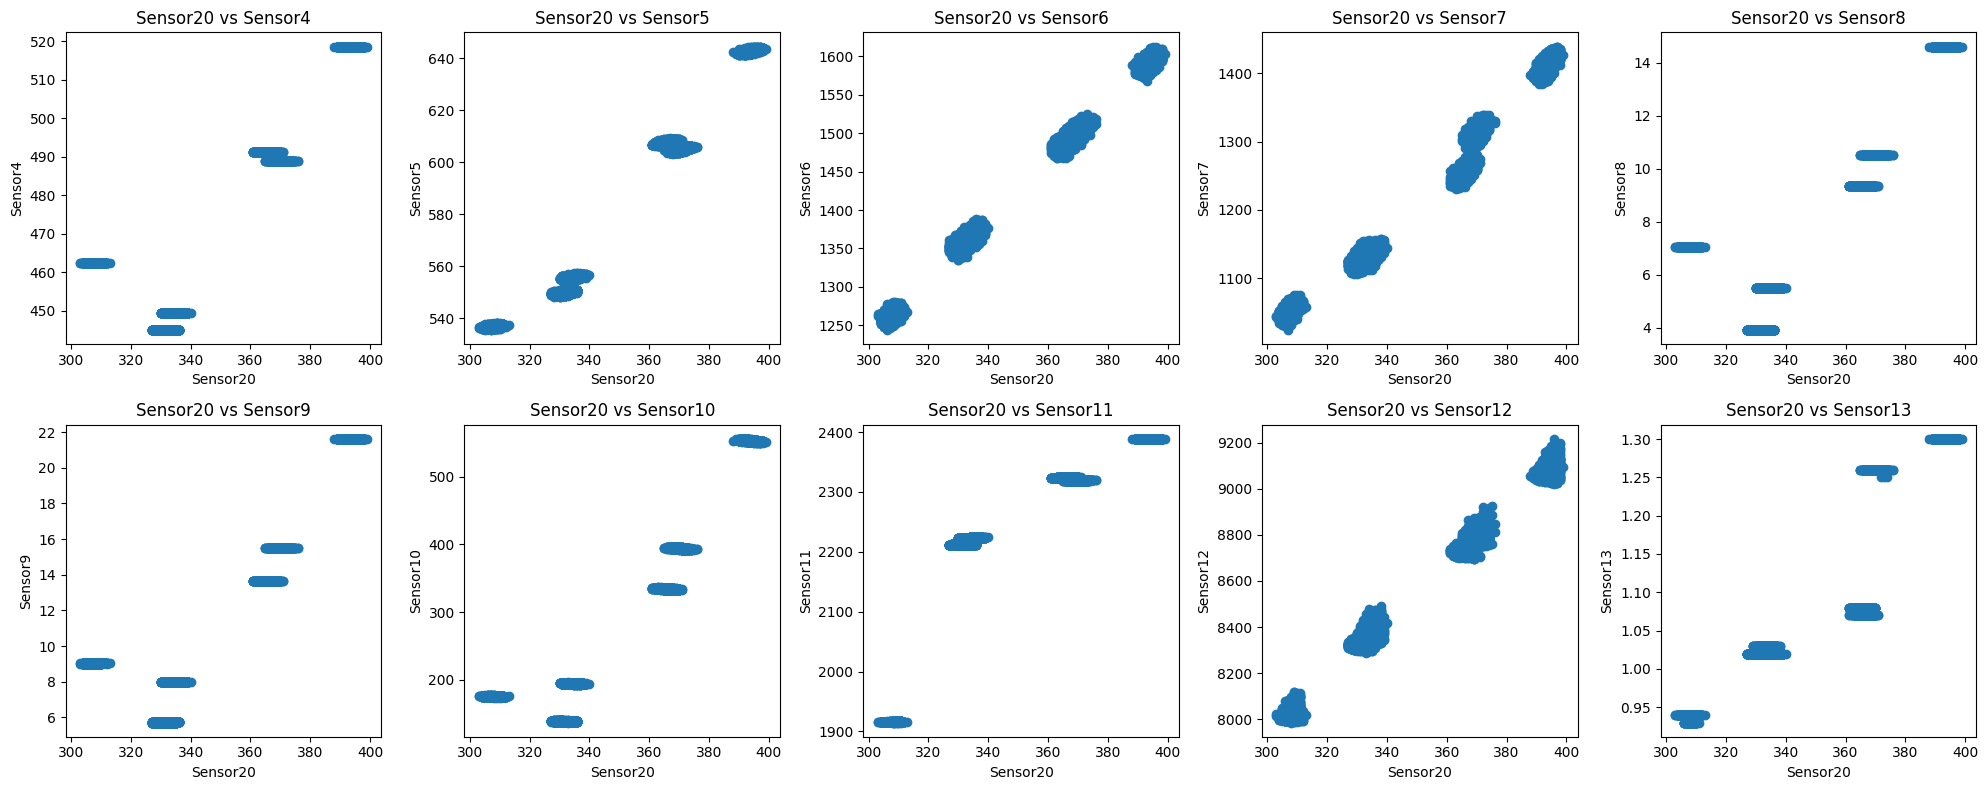

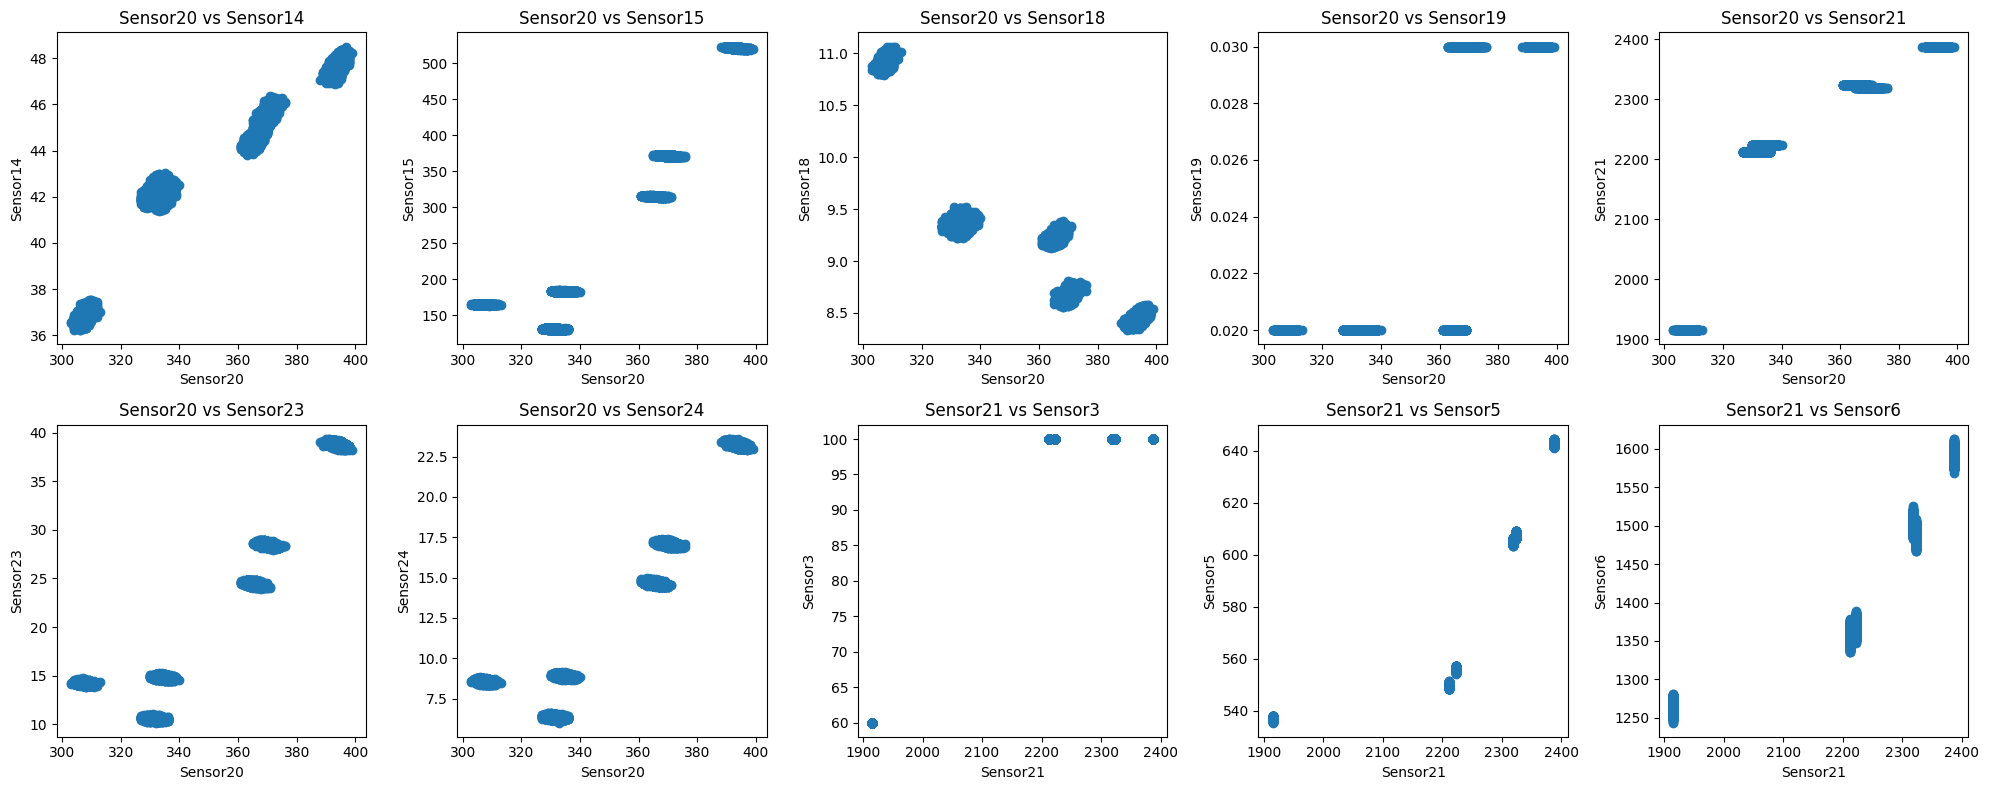

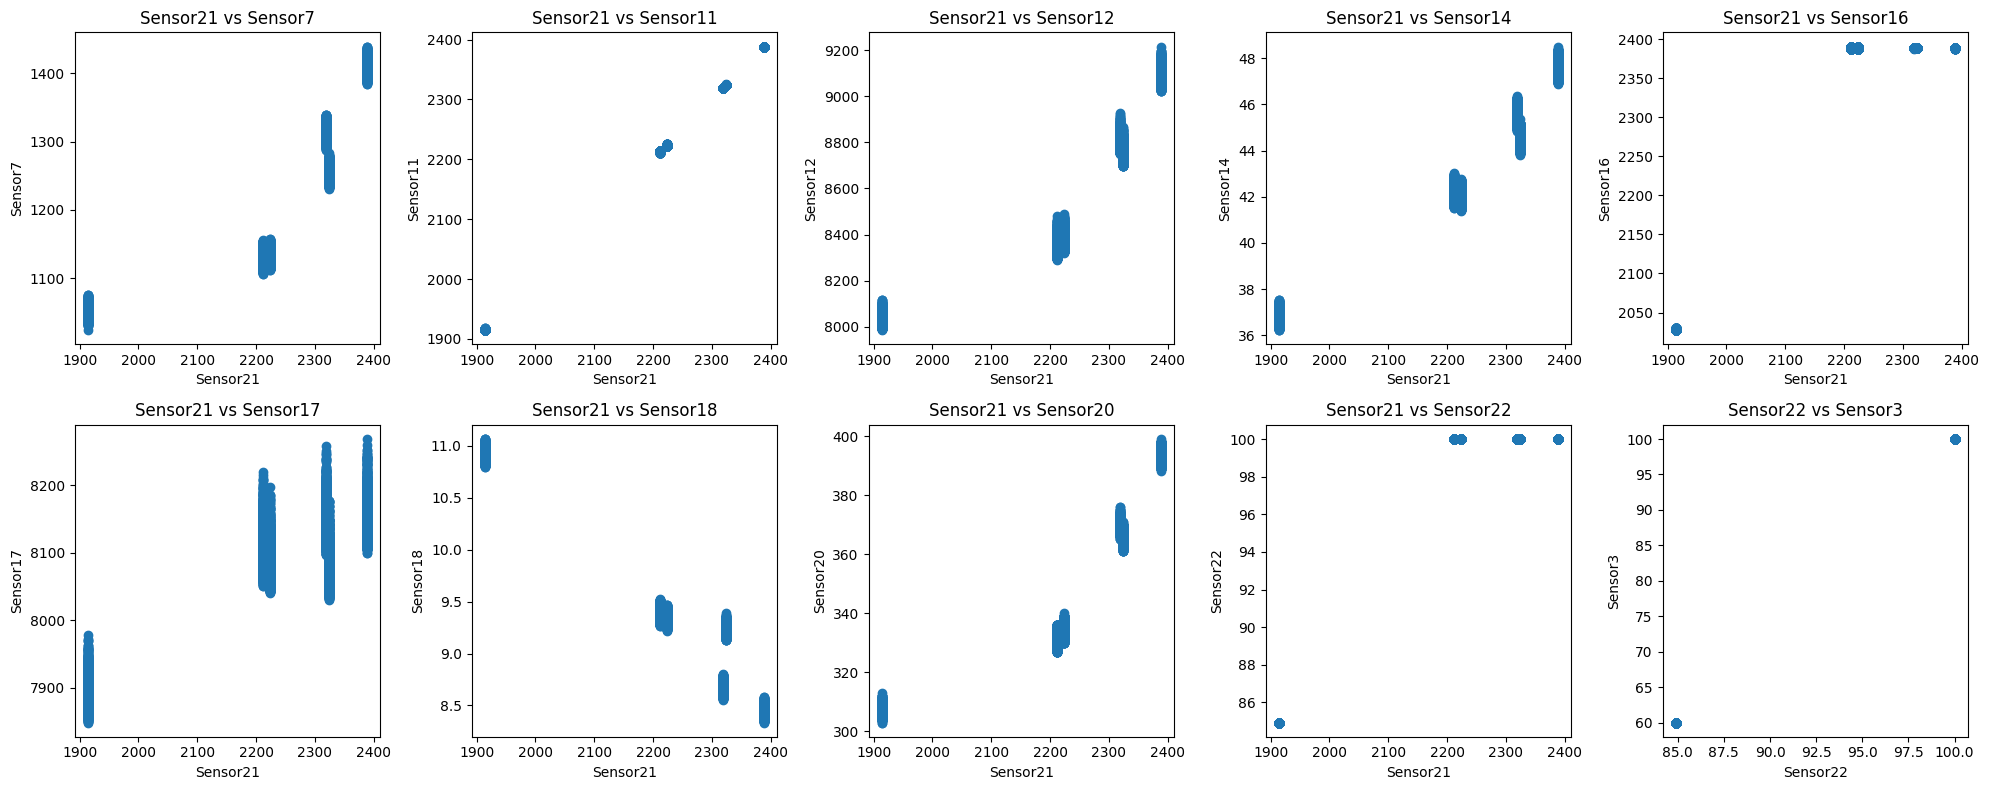

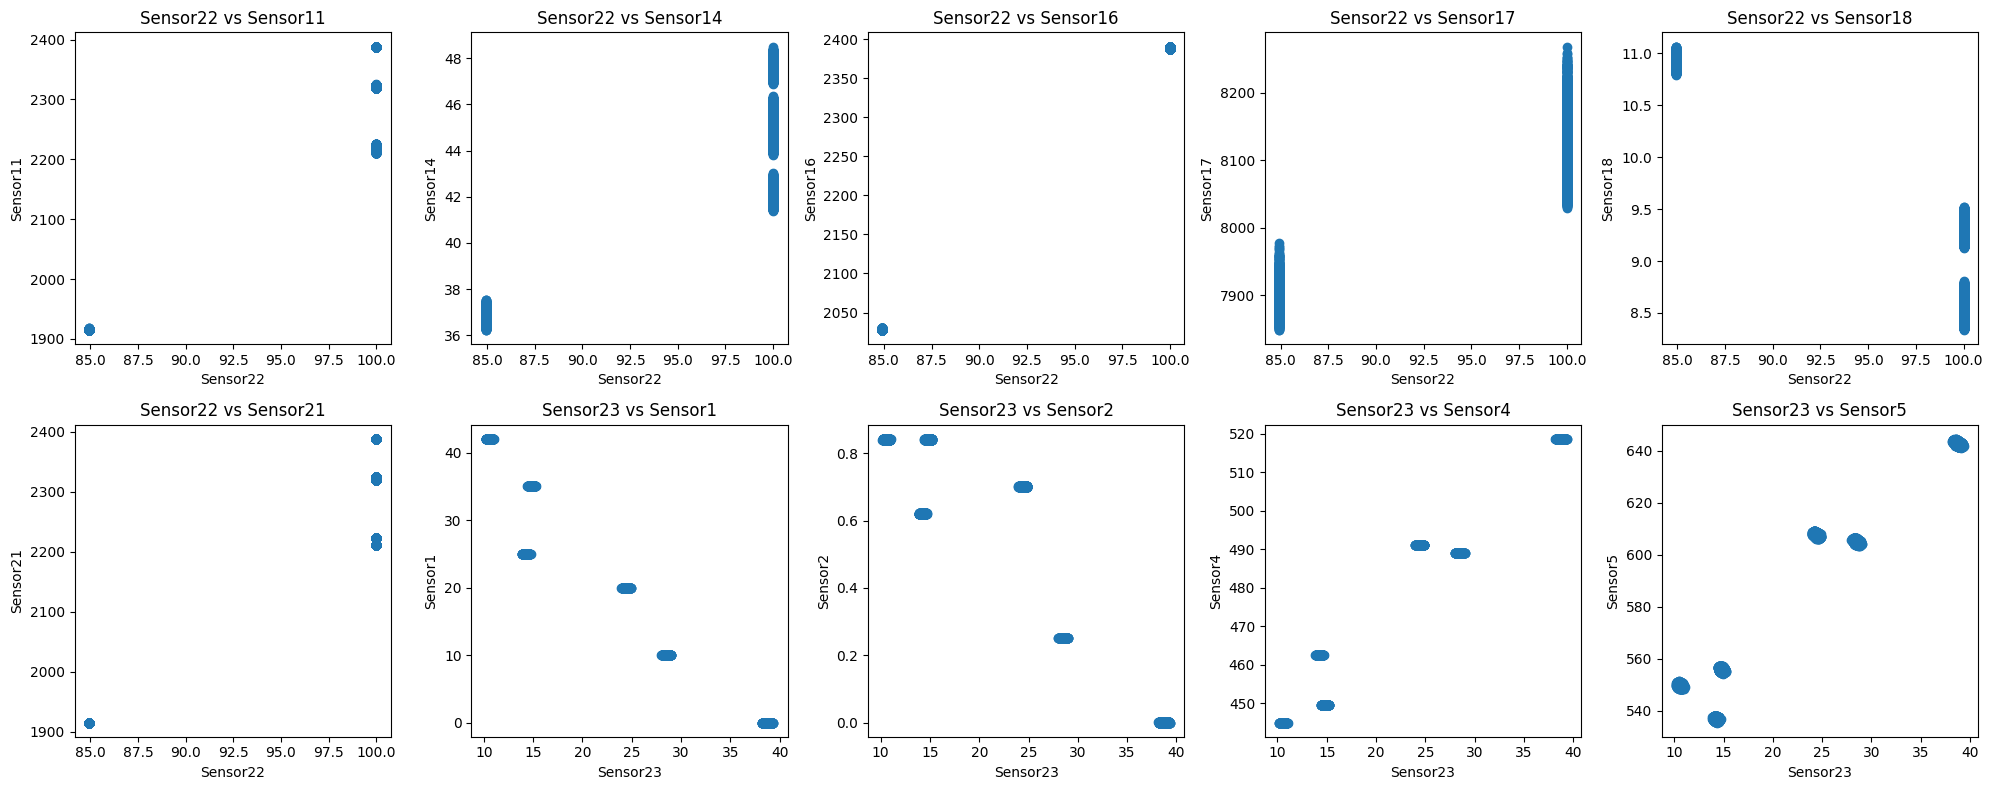

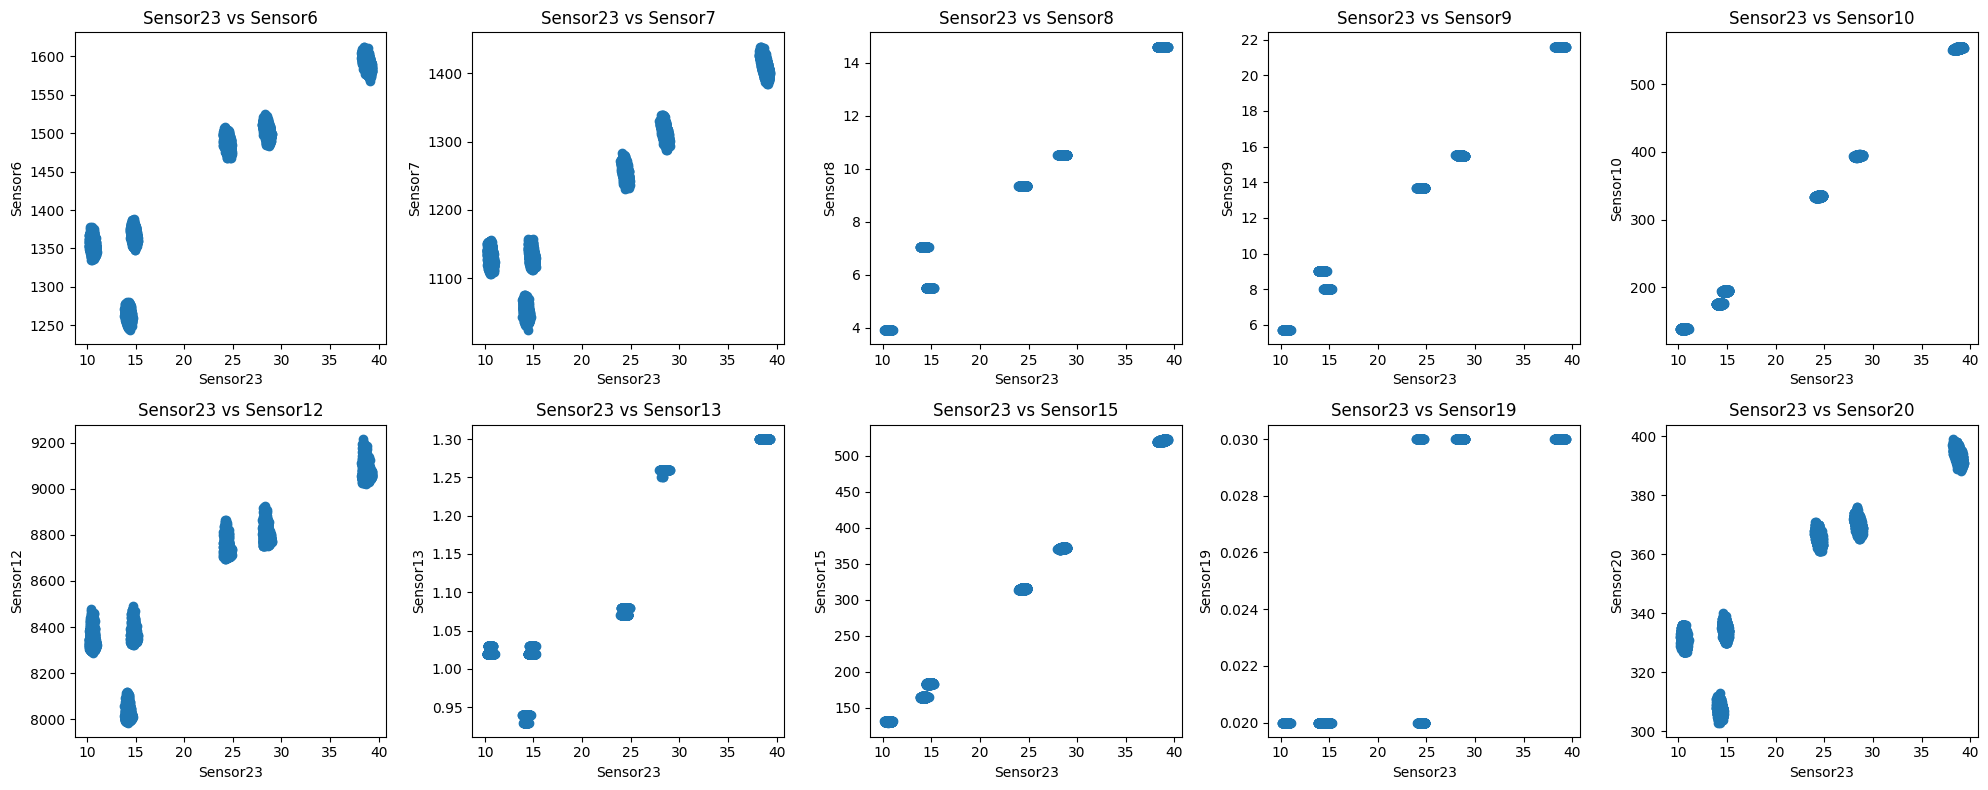

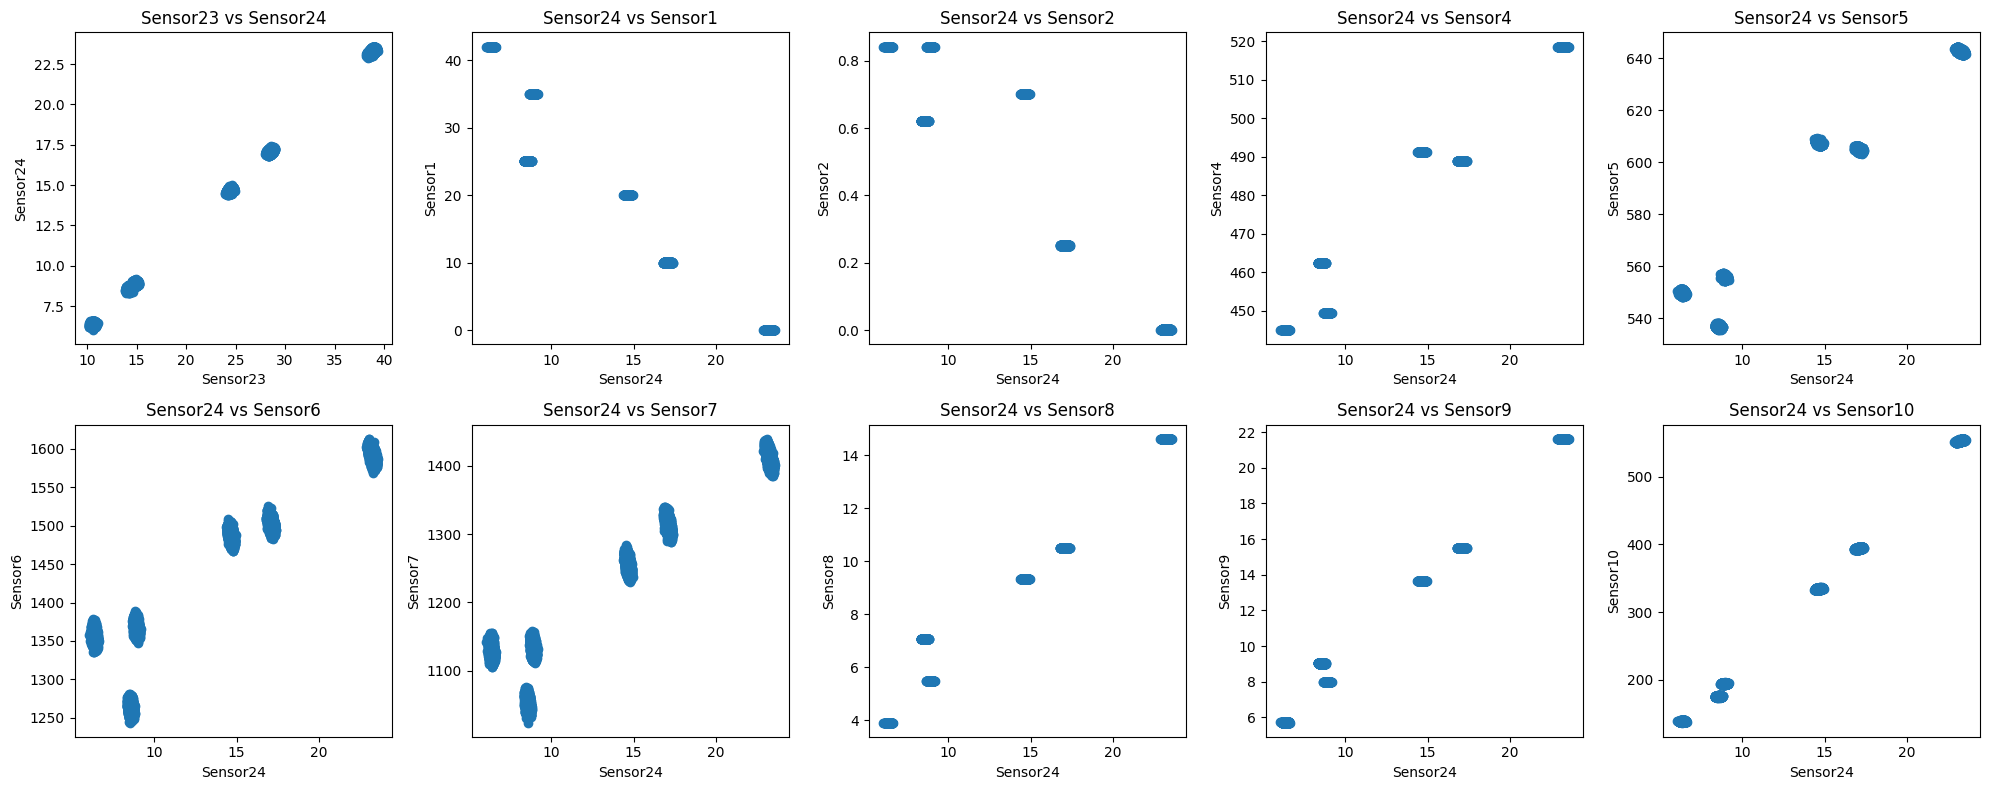

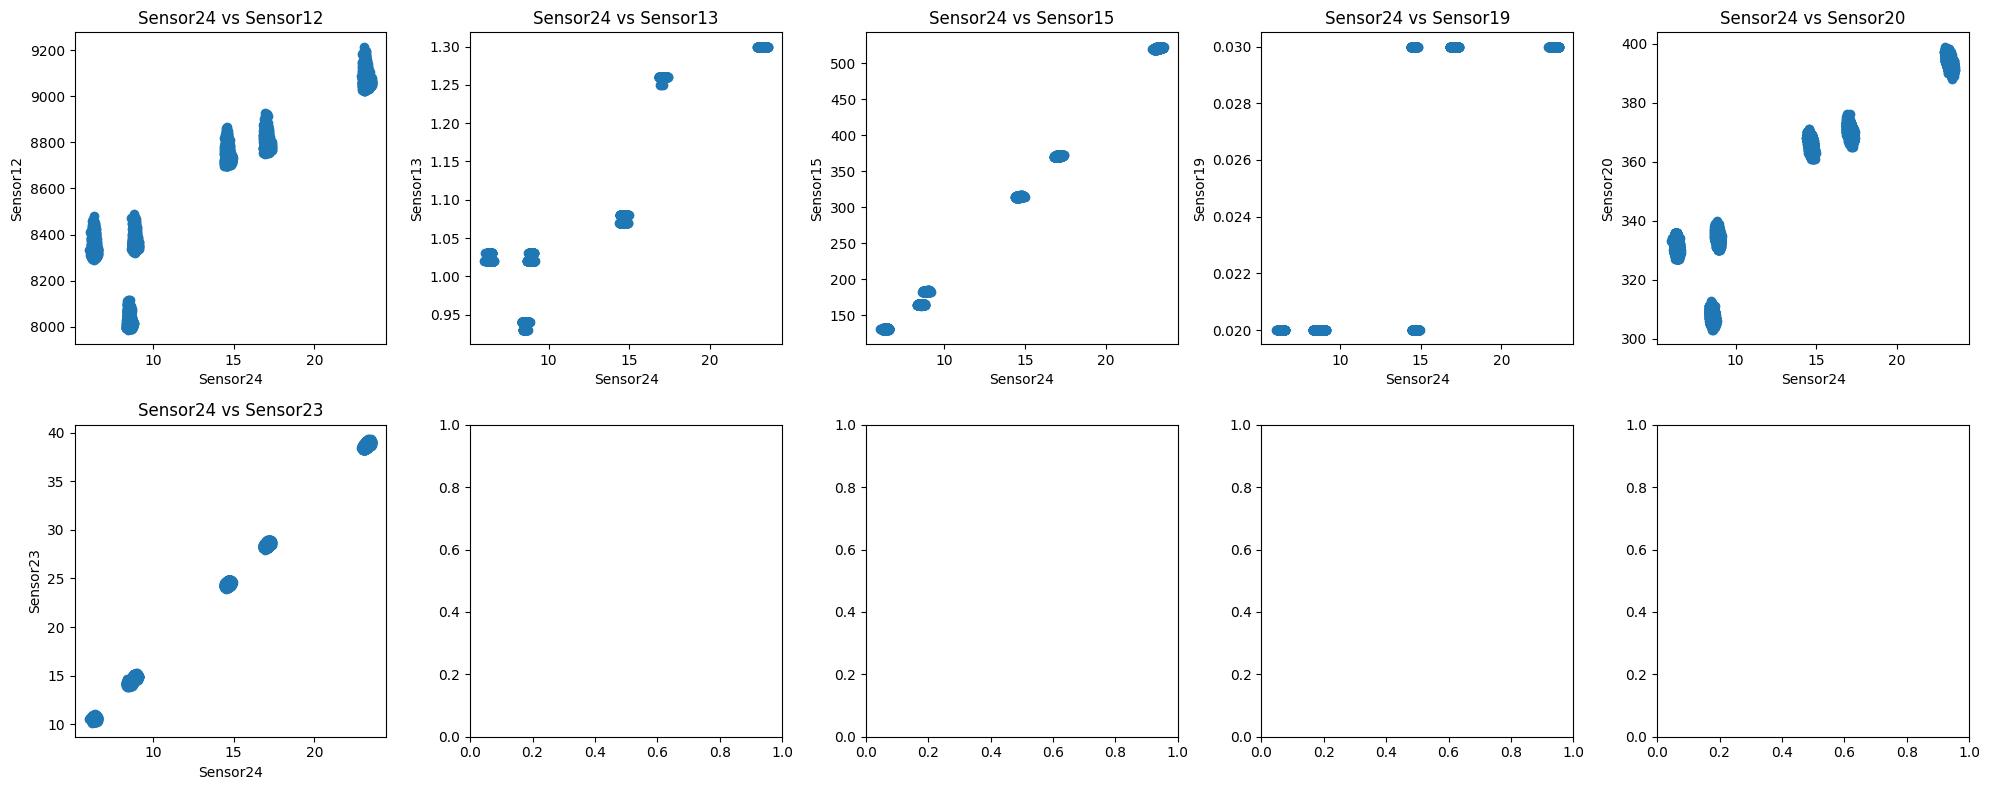

In [12]:
# Scatter plots for bivariate analysis based on Correlation Marrix Value.

corr_matrix = data.corr()
threshold = 0.8
sensors = data.columns

# Number of pairs with correlation above threshold
pairs = [(sensor, other_sensor) for sensor in sensors for other_sensor in sensors if sensor != other_sensor and abs(corr_matrix.loc[sensor, other_sensor]) > threshold]

selected_pairs = pairs

for j in range(0, len(selected_pairs), 10):
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))
    axs = axs.ravel()

    for i, (sensor, other_sensor) in enumerate(selected_pairs[j:j+10]):
        axs[i].scatter(data[sensor], data[other_sensor])
        axs[i].set_title(f'{sensor} vs {other_sensor}')
        axs[i].set_xlabel(sensor)
        axs[i].set_ylabel(other_sensor)

    plt.tight_layout()  
    plt.show()